In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv('AmesHousing_update.csv',index_col=0 )

In [3]:
pd.set_option('max_columns', None)


In [4]:
df.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
                   ...   
Sale Type          object
Sale Condition     object
SalePrice           int64
remodeled            bool
ms_type            object
Length: 82, dtype: object

In [5]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
1          Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
2          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
3          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
4          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      1Story             6             5        1960   
1        Norm      1Fam      1Story             5             6        1961   
2        Norm      1Fam      1Story             6             6        1958   
3        Norm      1Fam      1Story             7             5        1968   
4        Norm      1Fam      2Story             5             5        1997   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1960        Hip   CompShg      BrkFace      Plywood        Stone   
1            1961      Gable   CompShg      VinylSd      VinylSd         None   
2            1958        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
3            1968        Hip   CompShg      BrkFace      BrkFace         None   
4            1998      Gable   CompShg      VinylSd      VinylSd         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         112.0         TA         TA     CBlock        TA        Gd   
1           0.0         TA         TA     CBlock        TA        TA   
2         108.0         TA         TA     CBlock        TA        TA   
3           0.0         Gd         TA     CBlock        TA        TA   
4           0.0         TA         TA      PConc        Gd        TA   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            Gd            BLQ         639.0            Unf           0.0   
1            No            Rec         468.0            LwQ         144.0   
2            No            ALQ         923.0            Unf           0.0   
3            No            ALQ        1065.0            Unf           0.0   
4            No            GLQ         791.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        441.0         1080.0    GasA         Fa           Y      SBrkr   
1        270.0          882.0    GasA         TA           Y      SBrkr   
2        406.0         1329.0    GasA         TA           Y      SBrkr   
3       1045.0         2110.0    GasA         Ex           Y      SBrkr   
4        137.0          928.0    GasA         Gd           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0        1656           0                0         1656             1.0   
1         896           0                0          896             0.0   
2        1329           0                0         1329             0.0   
3        2110           0                0         2110             1.0   
4         928         701                0         1629             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          1          0              3              1   
1             0.0          1          0              2              1   
2             0.0          1          1              3              1   
3             0.0          2          1          

In [6]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [7]:
_50=df[null_columns].isnull().sum()>1422

In [8]:
_50columns=_50[_50 == True].index.tolist()

In [9]:
df.drop(_50columns,axis = 1,inplace=True)

In [10]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           20        RL         141.0     31770   Pave       IR1   
1           20        RH          80.0     11622   Pave       Reg   
2           20        RL          81.0     14267   Pave       IR1   
3           20        RL          93.0     11160   Pave       Reg   
4           60        RL          74.0     13830   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
1          Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
2          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
3          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
4          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      1Story             6             5        1960   
1        Norm      1Fam      1Story             5             6        1961   
2        Norm      1Fam      1Story             6             6        1958   
3        Norm      1Fam      1Story             7             5        1968   
4        Norm      1Fam      2Story             5             5        1997   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1960        Hip   CompShg      BrkFace      Plywood        Stone   
1            1961      Gable   CompShg      VinylSd      VinylSd         None   
2            1958        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
3            1968        Hip   CompShg      BrkFace      BrkFace         None   
4            1998      Gable   CompShg      VinylSd      VinylSd         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         112.0         TA         TA     CBlock        TA        Gd   
1           0.0         TA         TA     CBlock        TA        TA   
2         108.0         TA         TA     CBlock        TA        TA   
3           0.0         Gd         TA     CBlock        TA        TA   
4           0.0         TA         TA      PConc        Gd        TA   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            Gd            BLQ         639.0            Unf           0.0   
1            No            Rec         468.0            LwQ         144.0   
2            No            ALQ         923.0            Unf           0.0   
3            No            ALQ        1065.0            Unf           0.0   
4            No            GLQ         791.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        441.0         1080.0    GasA         Fa           Y      SBrkr   
1        270.0          882.0    GasA         TA           Y      SBrkr   
2        406.0         1329.0    GasA         TA           Y      SBrkr   
3       1045.0         2110.0    GasA         Ex           Y      SBrkr   
4        137.0          928.0    GasA         Gd           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0        1656           0                0         1656             1.0   
1         896           0                0          896             0.0   
2        1329           0                0         1329             0.0   
3        2110           0                0         2110             1.0   
4         928         701                0         1629             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          1          0              3              1   
1             0.0          1          0              2              1   
2             0.0          1          1              3              1   
3             0.0          2          1              3              1   
4           

In [11]:
len(df.columns)

78

In [12]:
df.isnull().any()

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Sale Type         False
Sale Condition    False
SalePrice         False
remodeled         False
ms_type           False
Length: 78, dtype: bool

In [13]:
df.isnull().any()

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Sale Type         False
Sale Condition    False
SalePrice         False
remodeled         False
ms_type           False
Length: 78, dtype: bool

In [14]:
len(df)

2930

In [15]:
df.isnull().sum()[:50]

MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [16]:
df.isnull().sum()[:15]

MS SubClass       0
MS Zoning         0
Lot Frontage    490
Lot Area          0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
dtype: int64

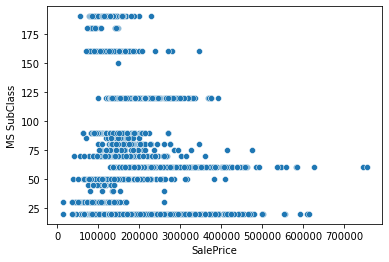

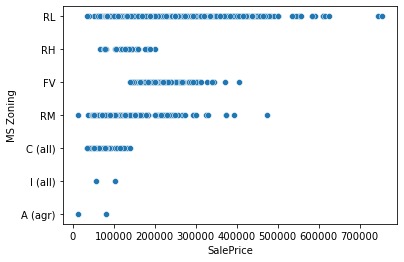

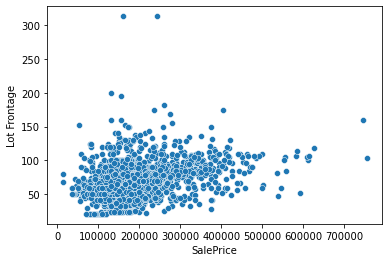

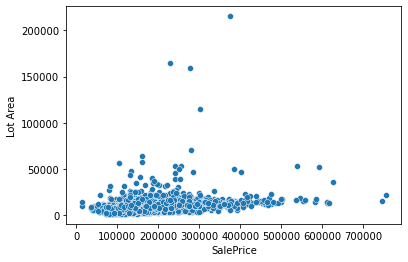

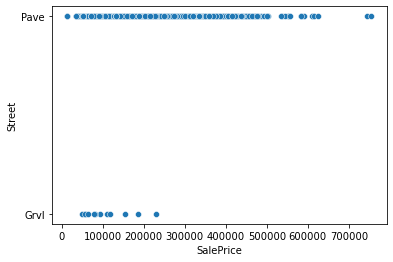

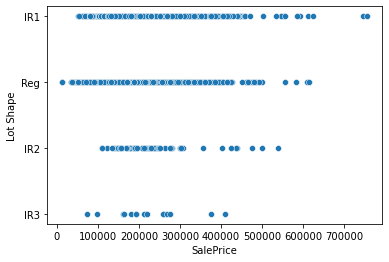

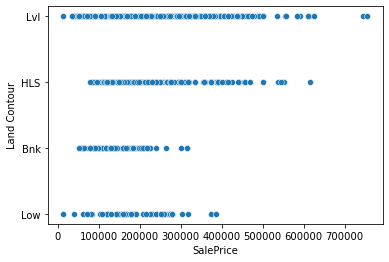

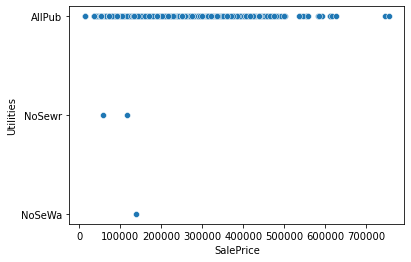

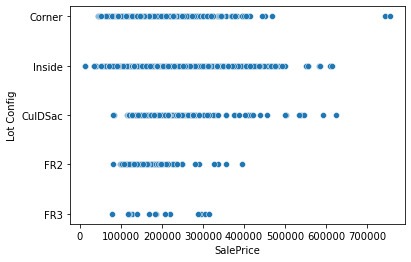

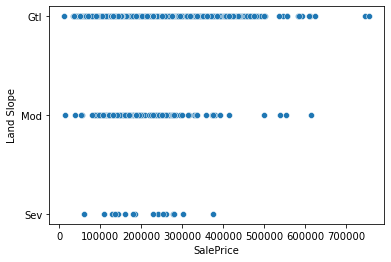

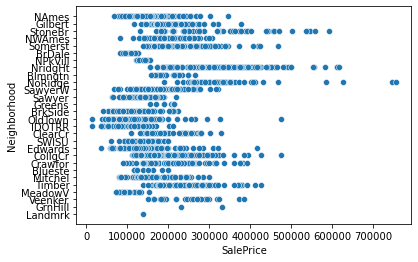

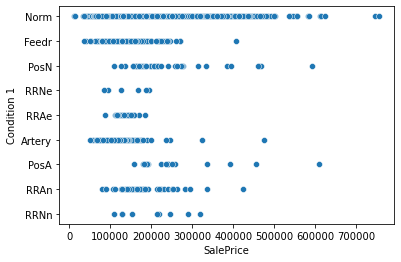

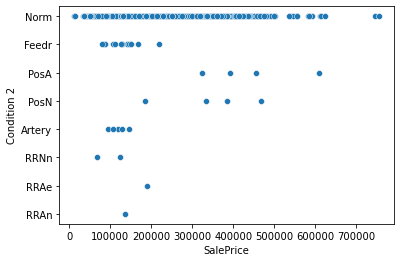

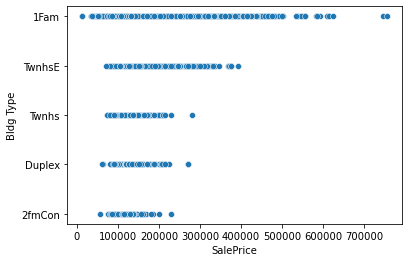

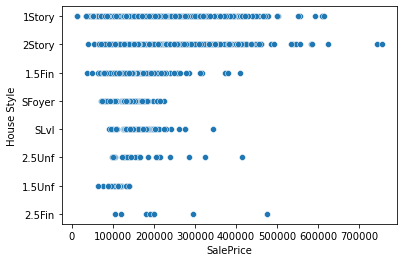

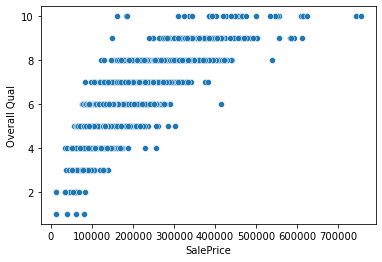

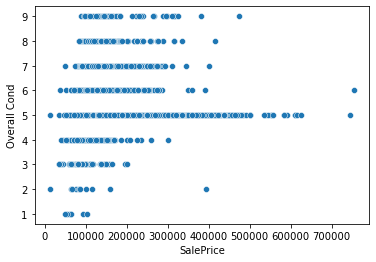

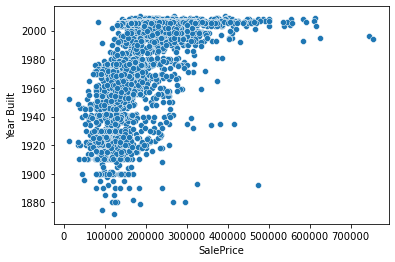

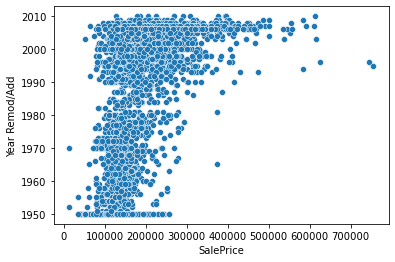

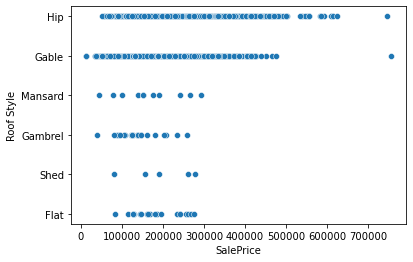

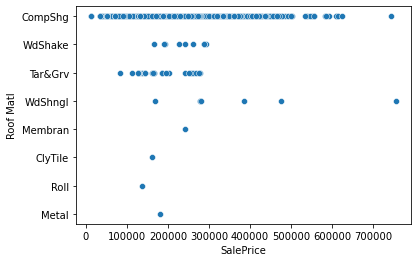

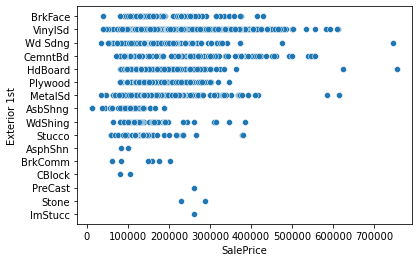

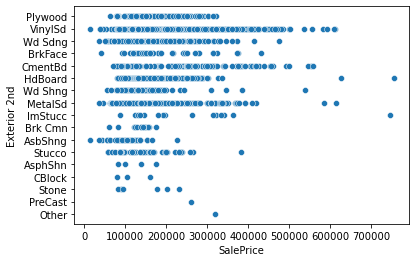

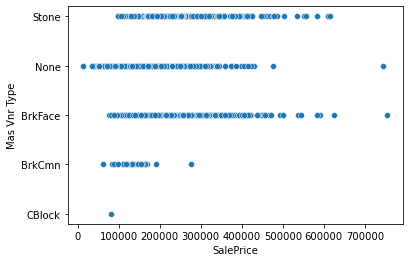

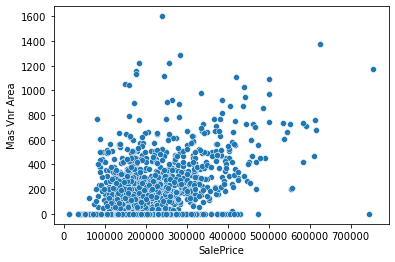

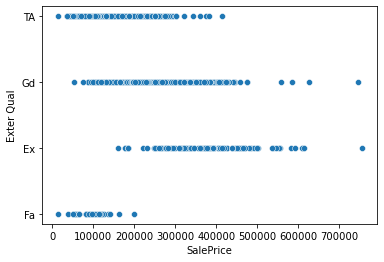

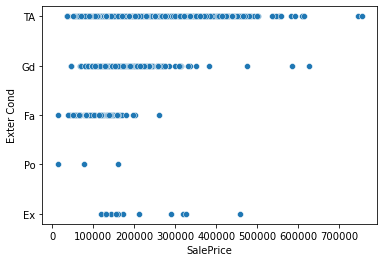

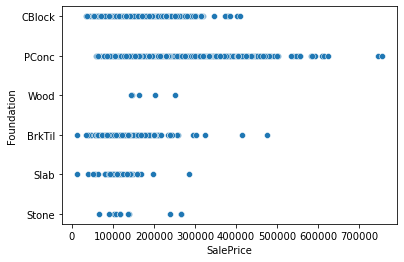

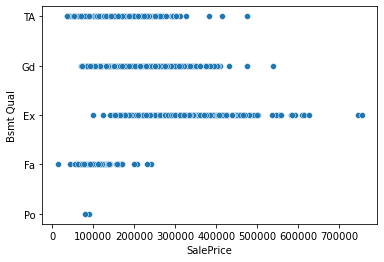

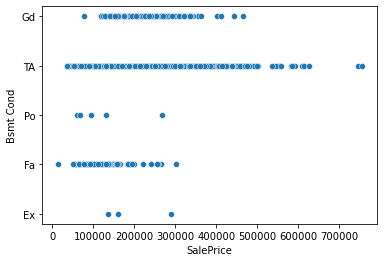

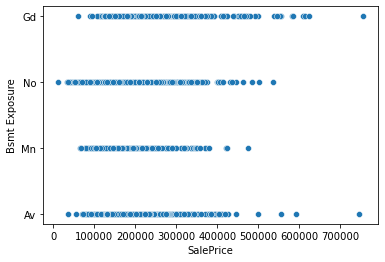

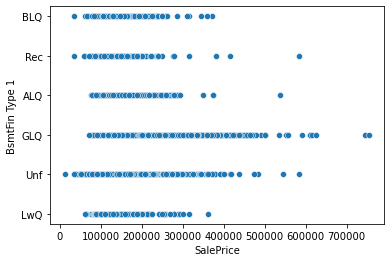

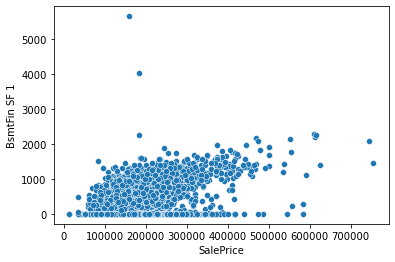

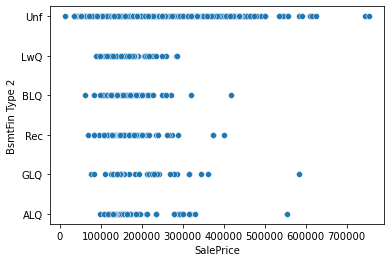

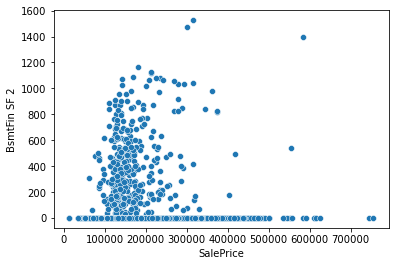

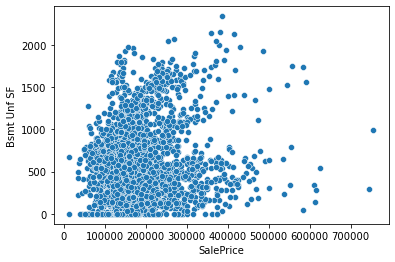

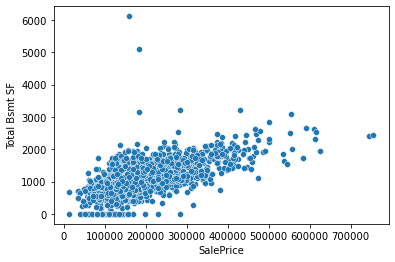

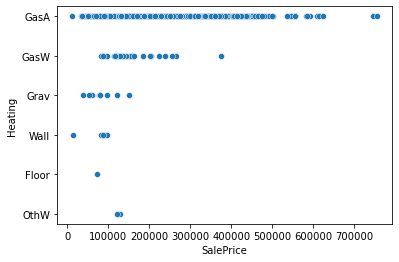

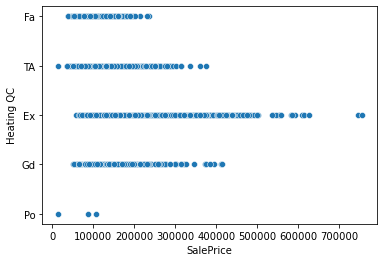

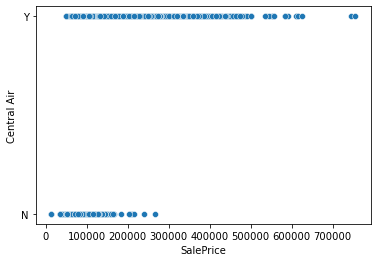

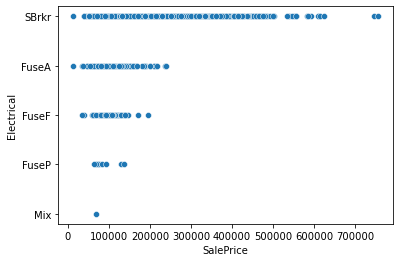

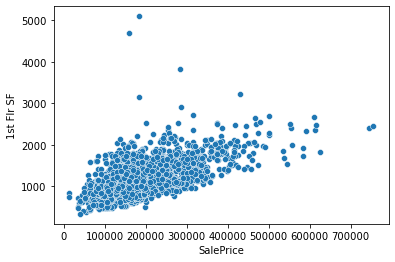

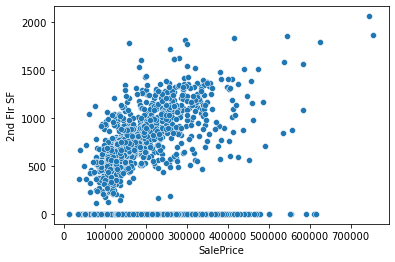

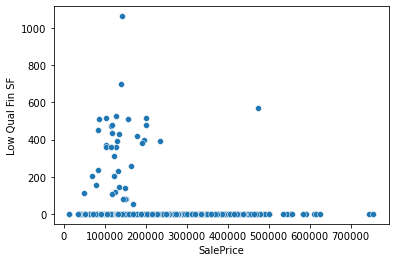

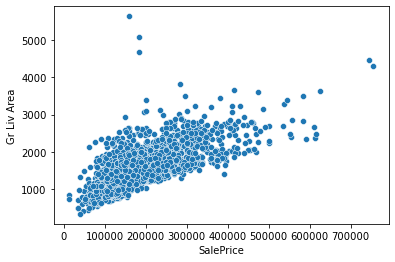

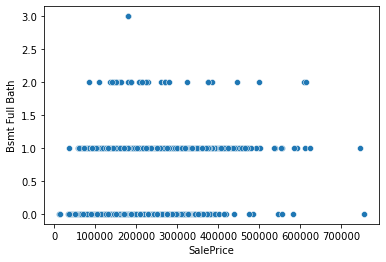

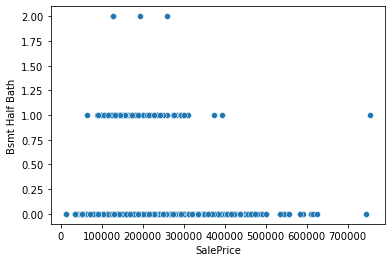

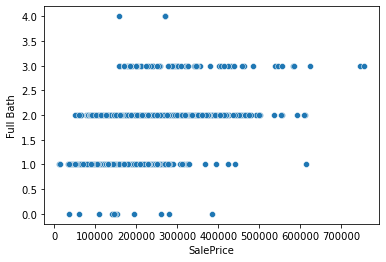

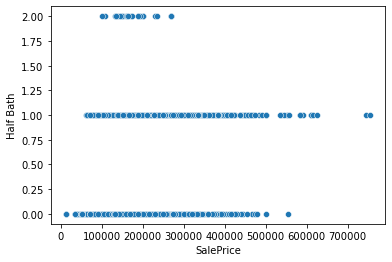

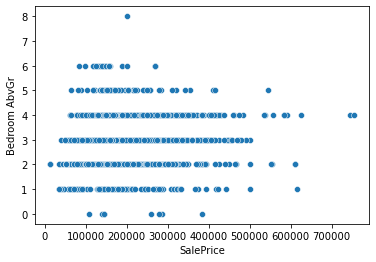

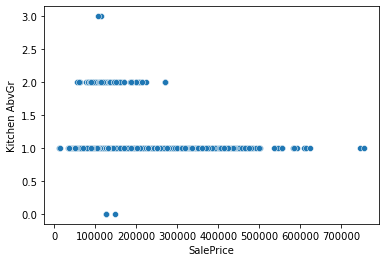

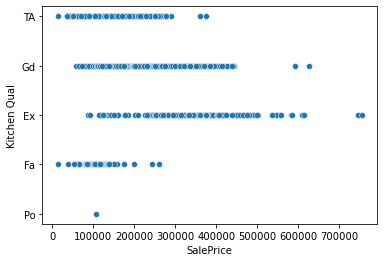

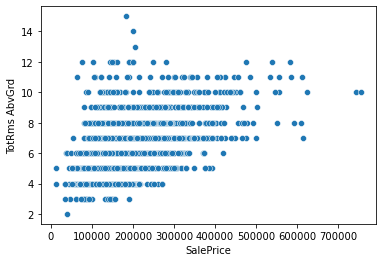

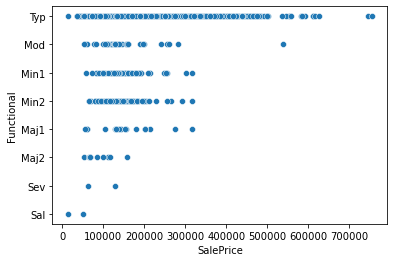

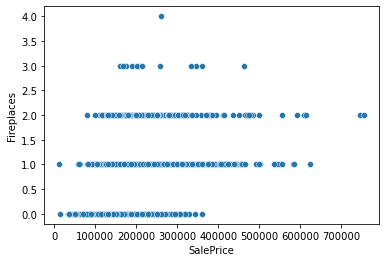

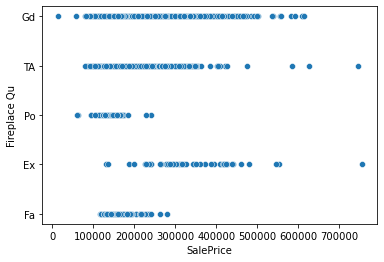

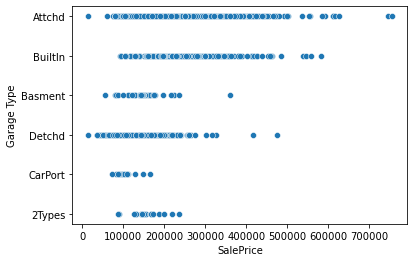

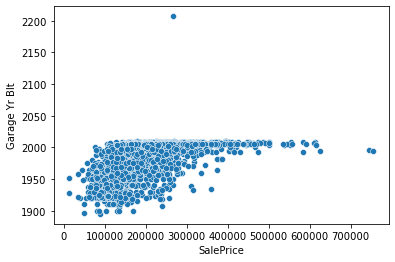

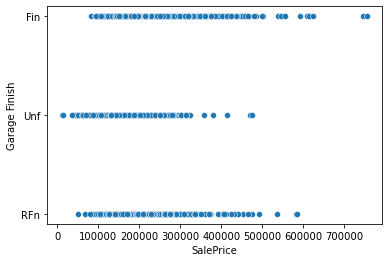

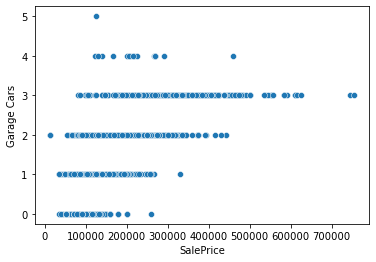

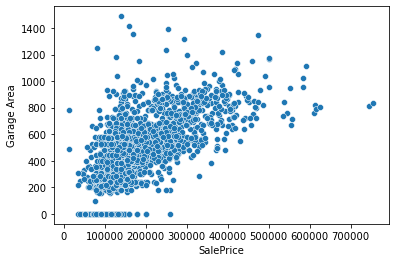

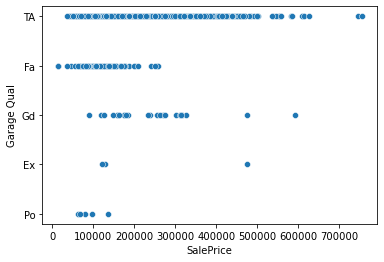

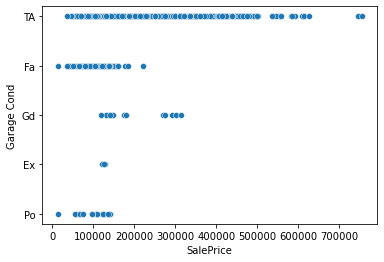

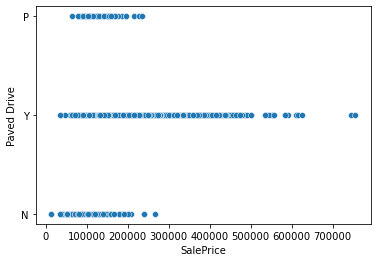

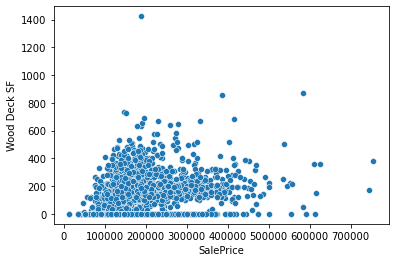

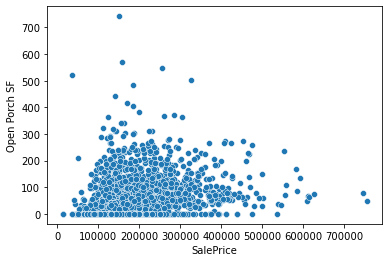

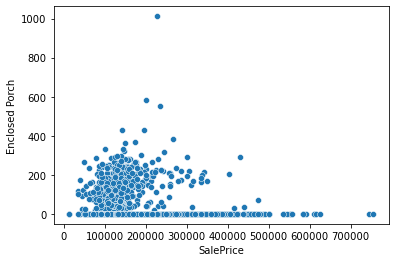

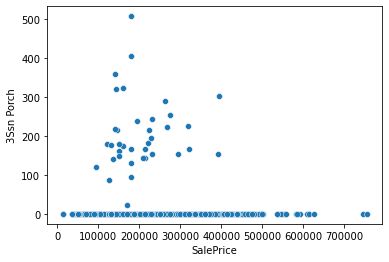

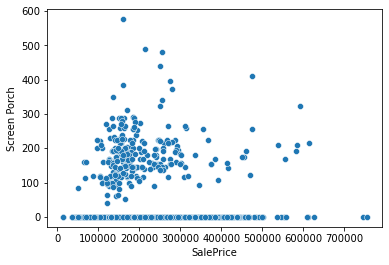

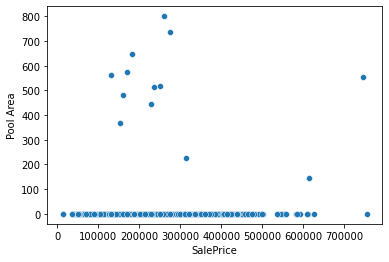

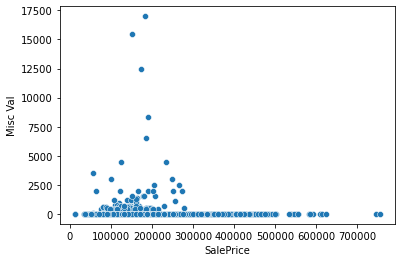

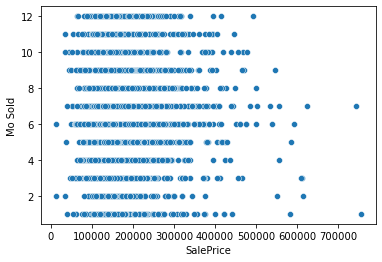

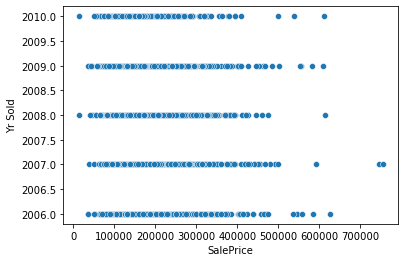

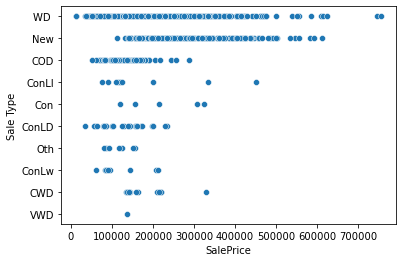

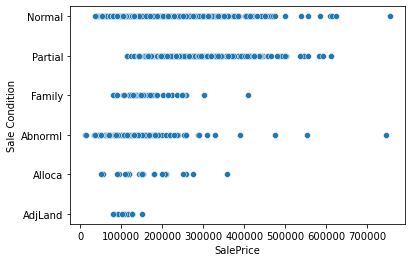

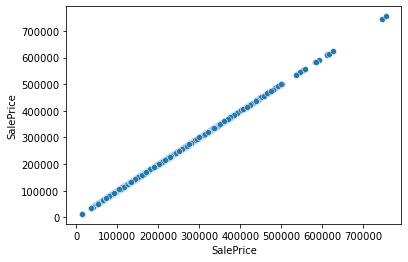

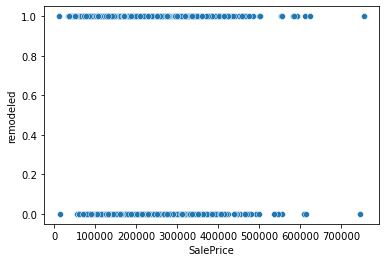

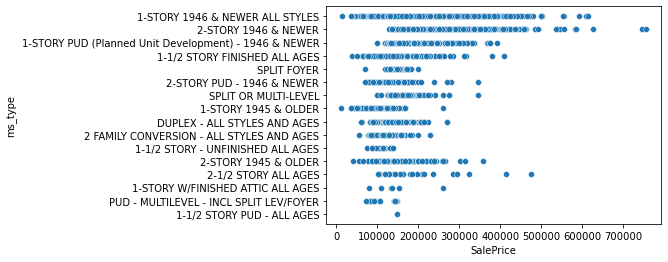

In [143]:
#sales price 
for c in df.columns: 
    sns.scatterplot(x="SalePrice", y=c, data=df)
    plt.show()

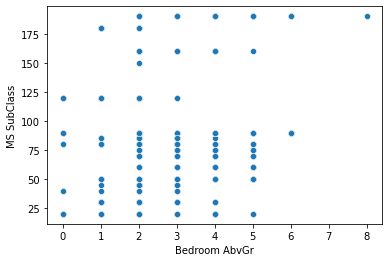

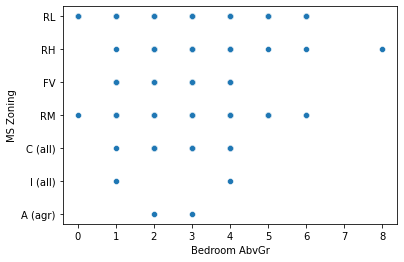

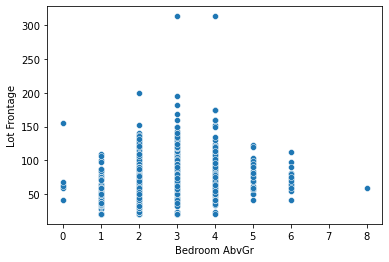

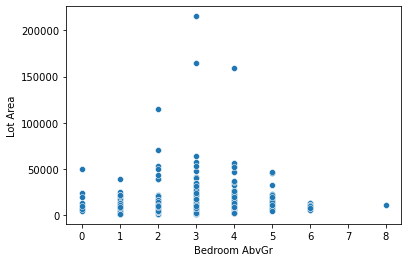

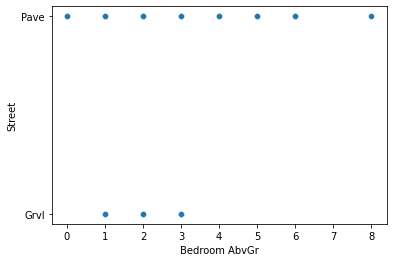

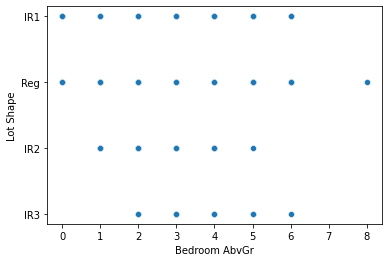

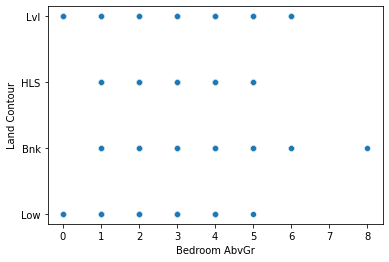

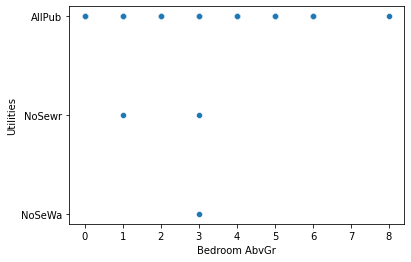

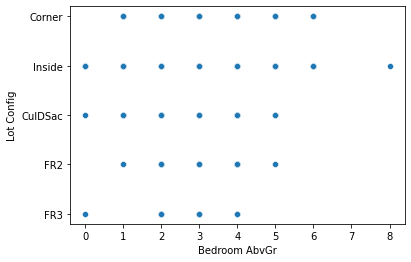

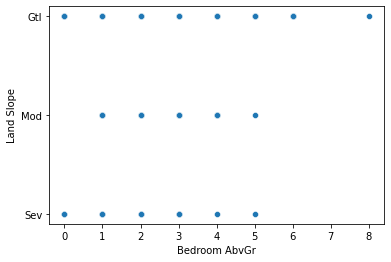

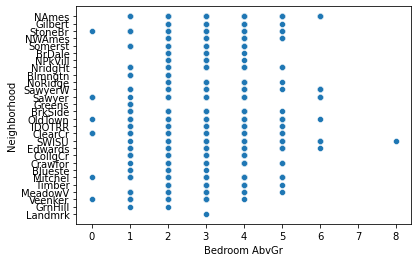

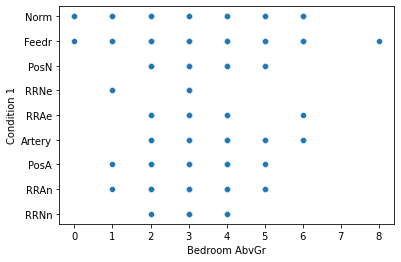

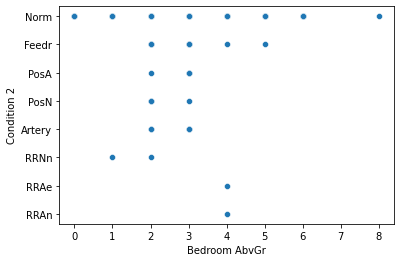

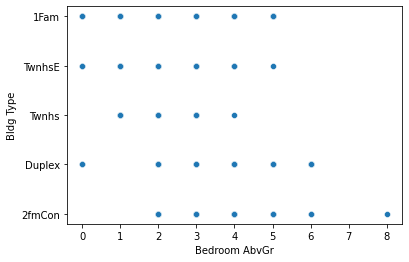

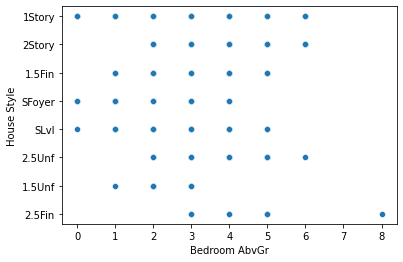

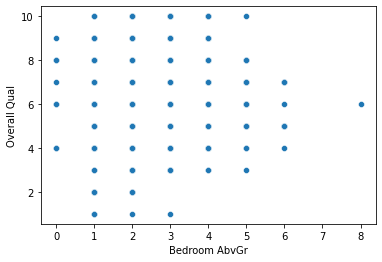

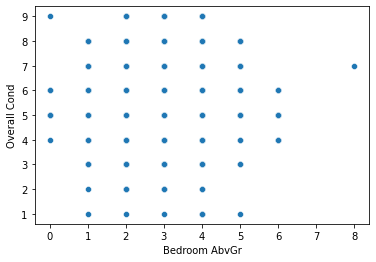

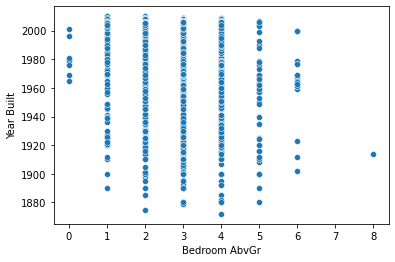

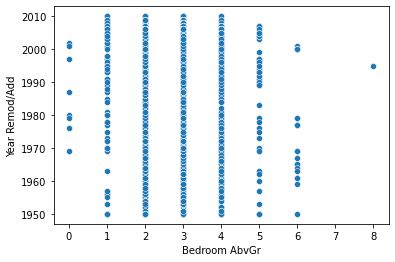

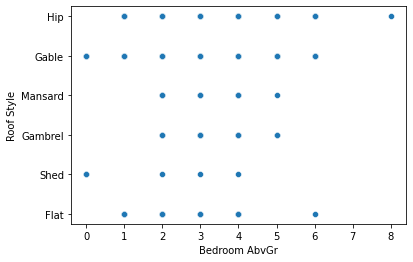

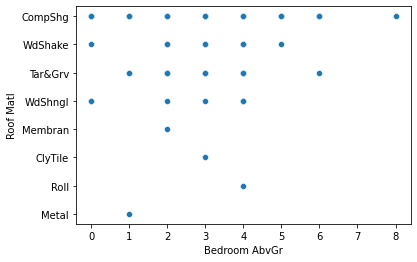

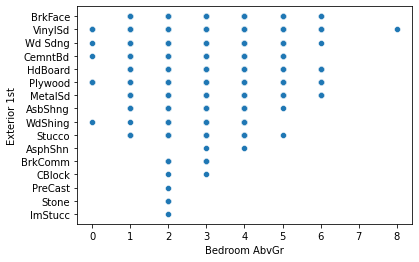

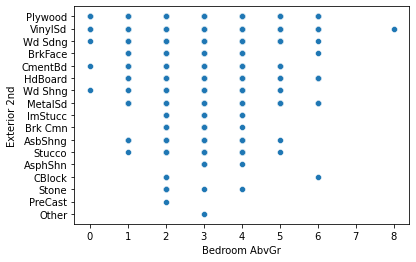

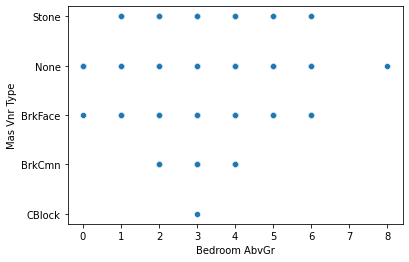

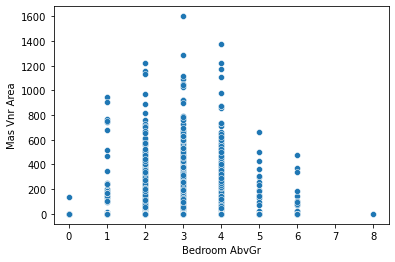

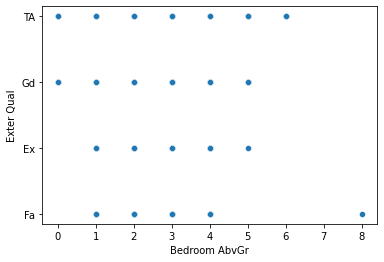

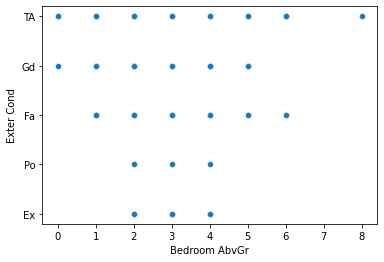

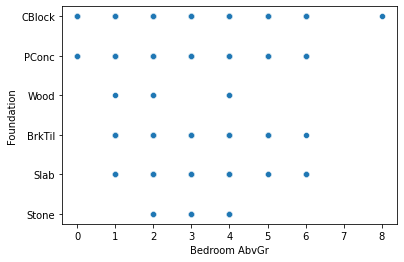

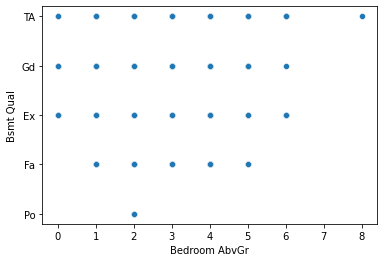

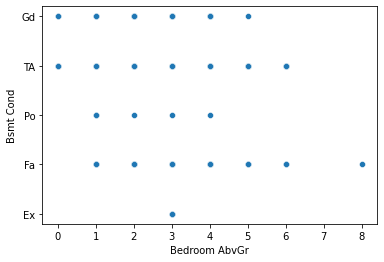

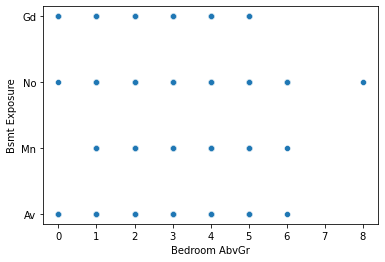

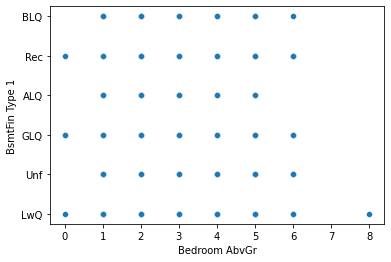

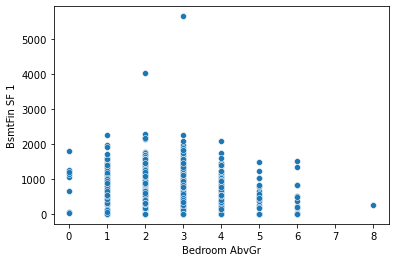

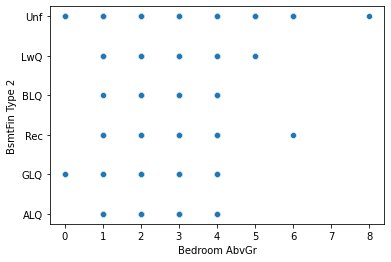

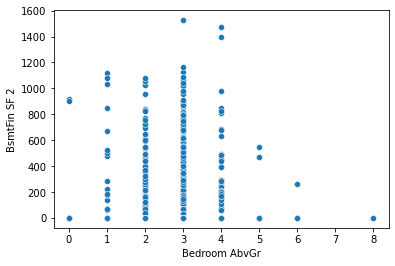

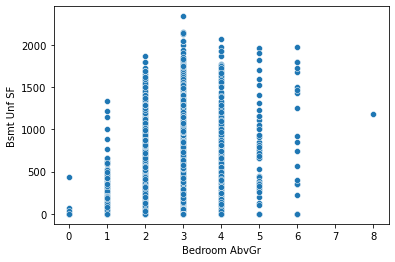

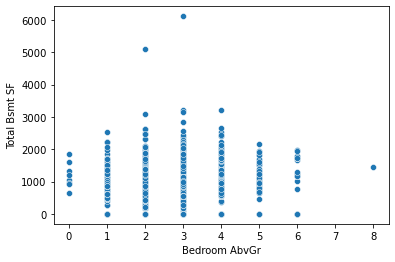

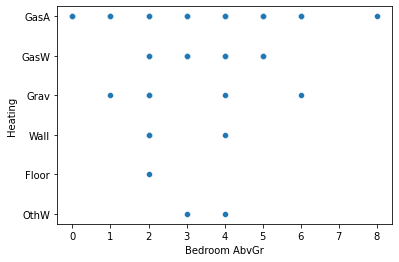

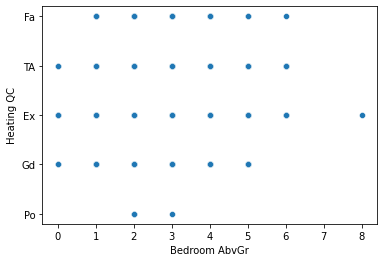

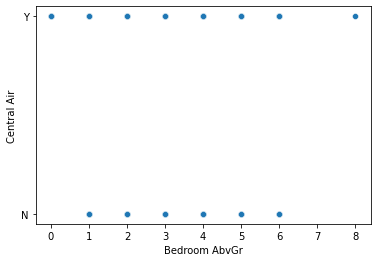

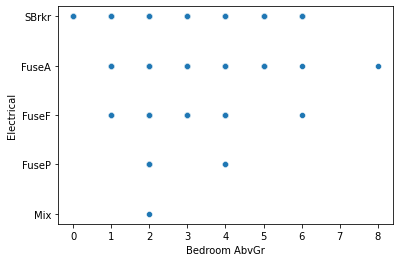

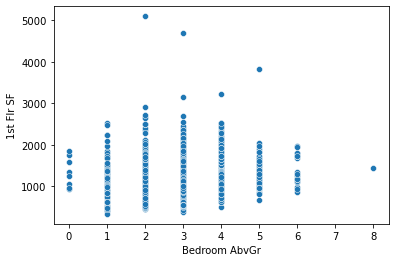

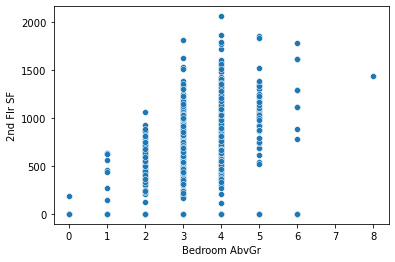

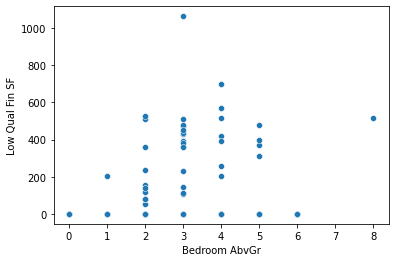

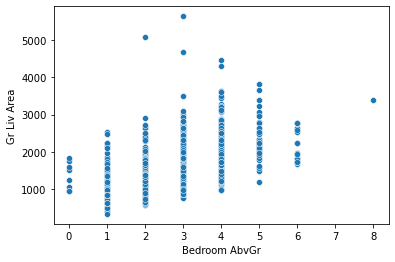

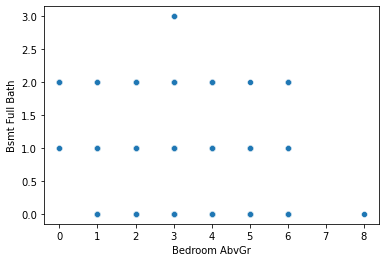

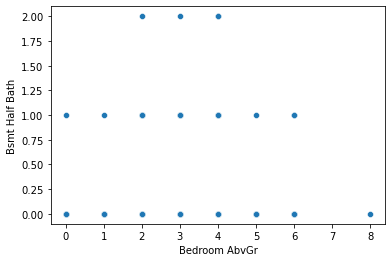

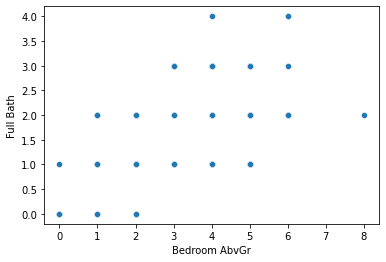

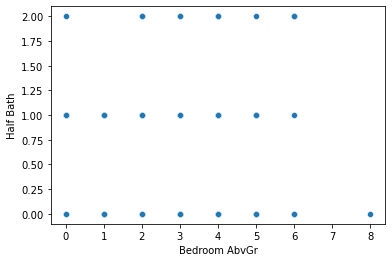

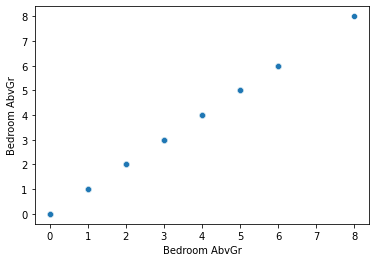

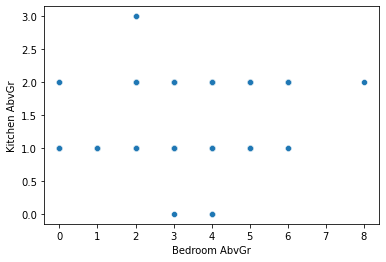

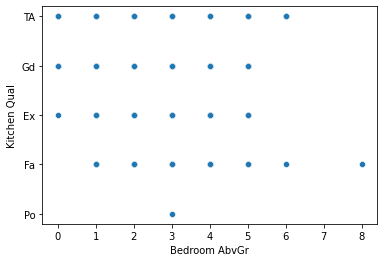

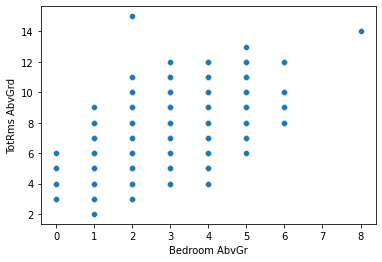

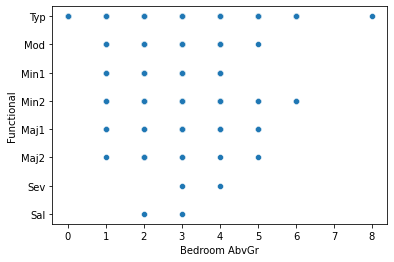

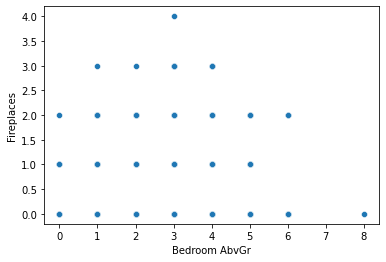

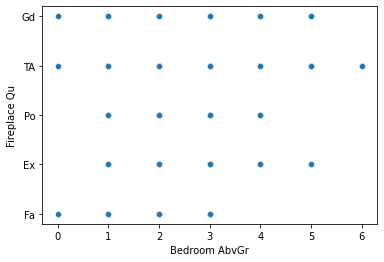

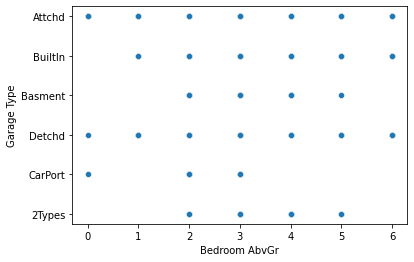

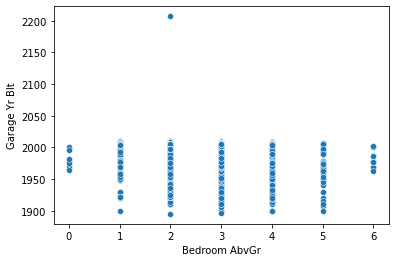

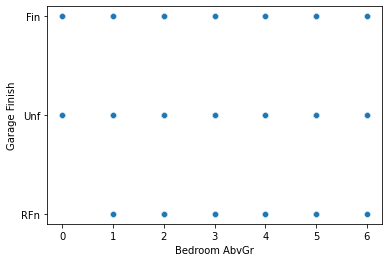

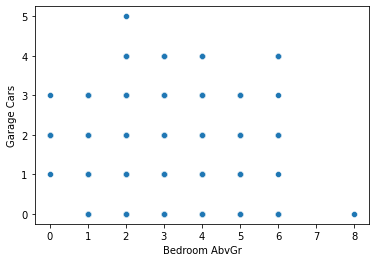

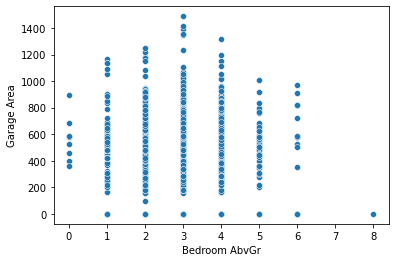

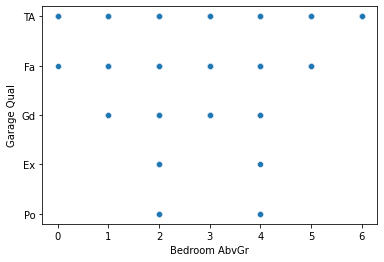

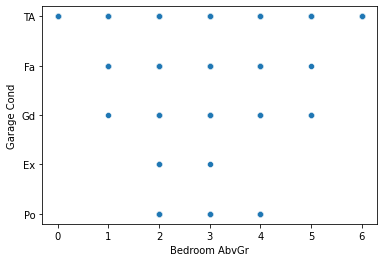

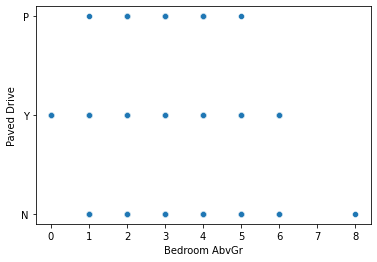

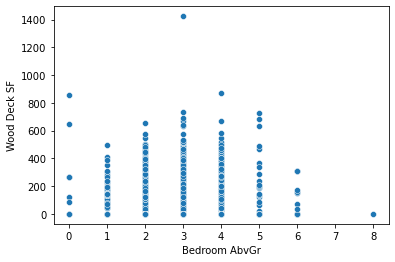

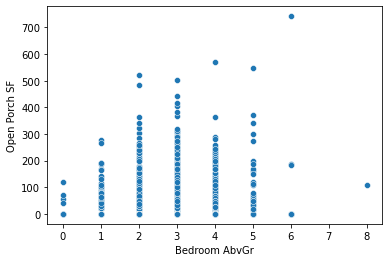

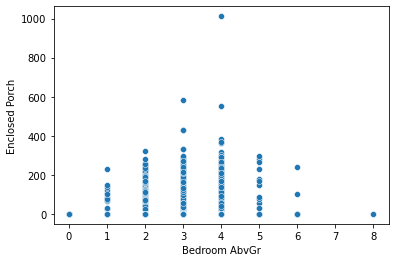

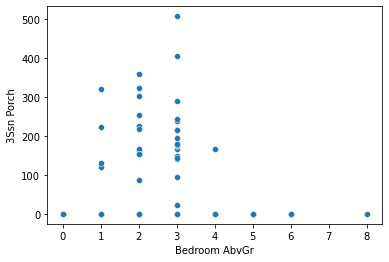

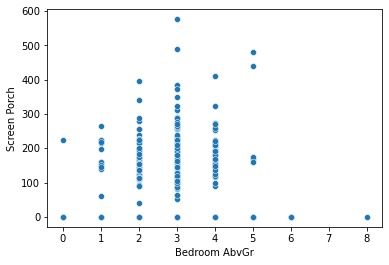

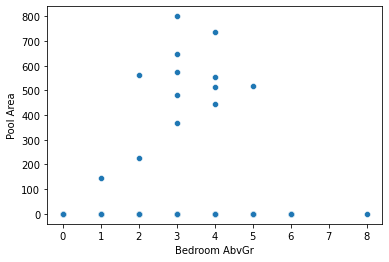

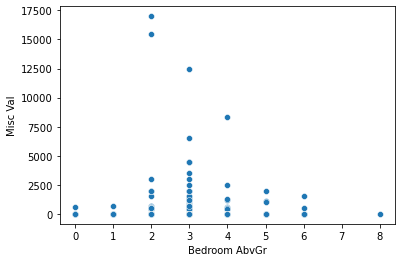

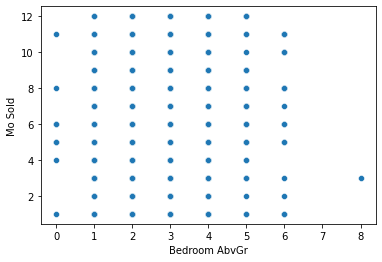

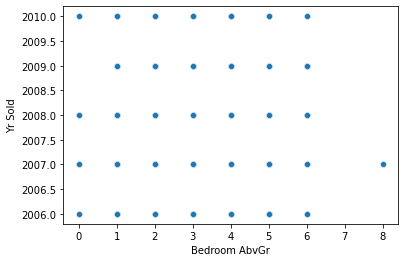

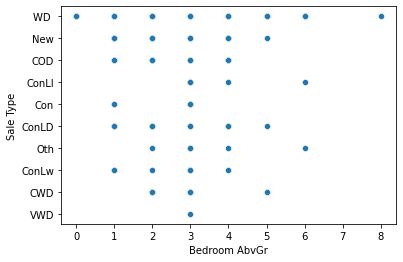

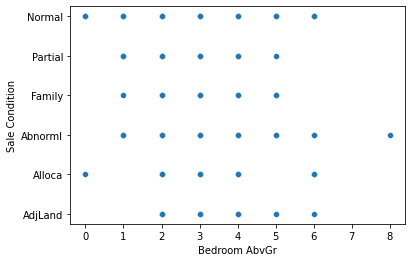

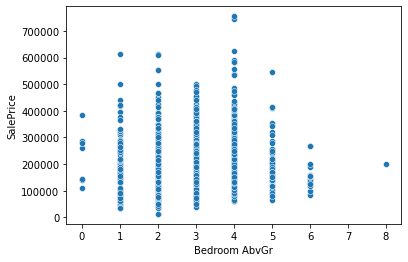

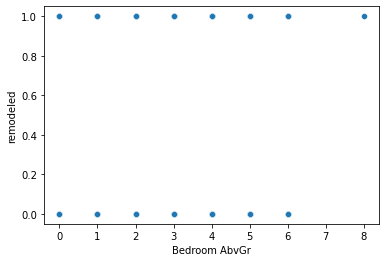

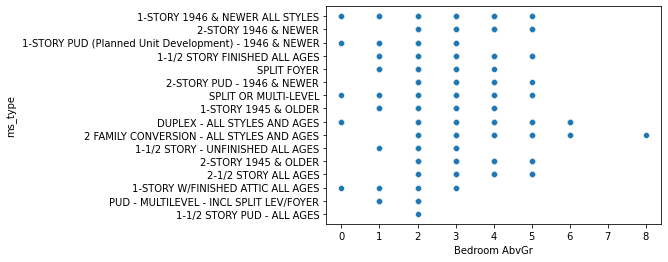

In [144]:
for c in df.columns: 
    sns.scatterplot(x="Bedroom AbvGr", y=c, data=df)
    plt.show()

TypeError: Could not convert RLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLRHRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRHRMRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVFVFVRLRLRLFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRLRLRLRLC (all)RHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRHRLRLRLRLRLRLRLRMRMRLRMRMRMC (all)C (all)C (all)C (all)RMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRHRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMC (all)RMRMRMRMRMC (all)C (all)RLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRLRMRMRMRMRMRMRMRMRMRMRMRMRLRLRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRHRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRLRLRLRMRMRMC (all)C (all)RMI (all)RLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRLRMRLRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRMRMRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRLRMRLRLRLRLRLRLRLRLRLRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMA (agr)C (all)C (all)C (all)C (all)C (all)RMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRLRMRLRMRMRMRMRMRLRMRMRLRLRLRLRLRLRLRLRLI (all)RLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRHRHRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMC (all)RMRMRMRMRMRMRLRMRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRHRLRLRLRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRMRLRLRLRMRMRMRMRMRMRMRMRMRMRMC (all)C (all)C (all)RMRMRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRMRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRLRLRLRHRMRMRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRLRLRHRHRLRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVFVFVFVFVFVFVFVFVFVFVRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMRMC (all)RLRLRLRMRMRMRMRMRMRMRMRMRMRMRMRLRMRLRMRMRMRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMRMRMRLRLRLRLRLRLRLRLRLRLRLRLRHRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRMRMRMC (all)C (all)C (all)C (all)C (all)RMRMRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLA (agr)RMRMRMRLRMRMRMRLRLRMRMRLRMRMRMRMRMRLRLRLRLRLRLRLRLRL to numeric

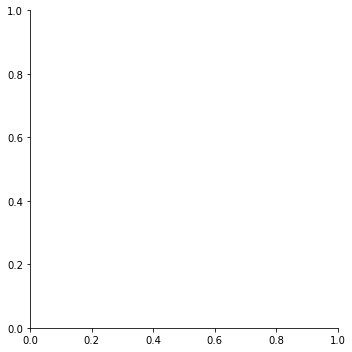

In [5]:
for i in df:
    if df[i].dtype=='object':
        sns.lmplot(x="SalePrice", y=i, data=df)
        plt.show()

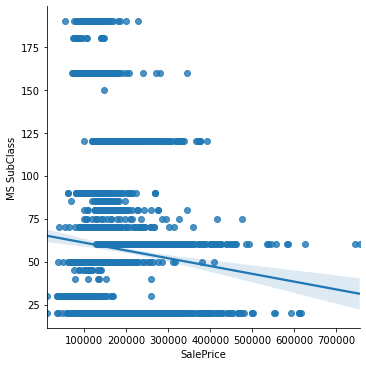

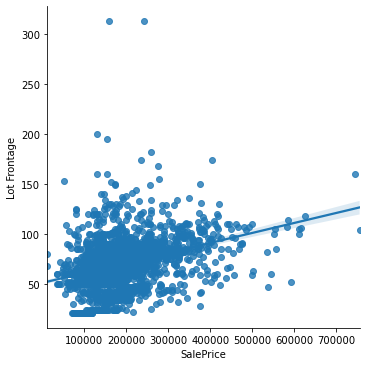

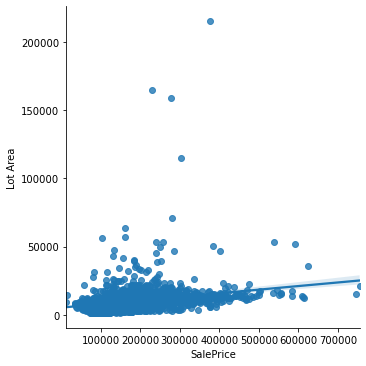

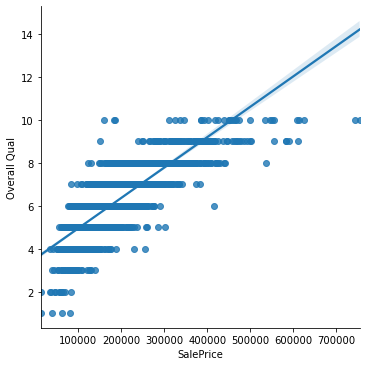

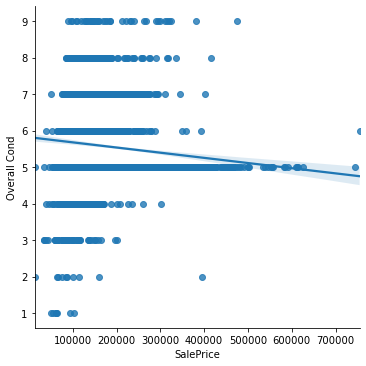

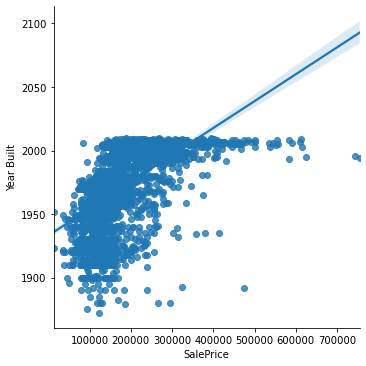

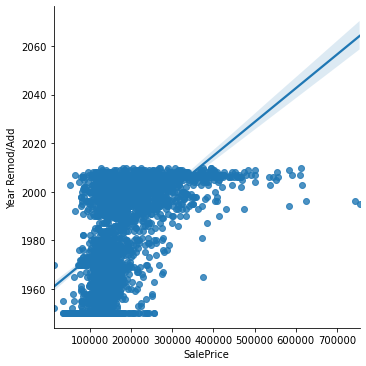

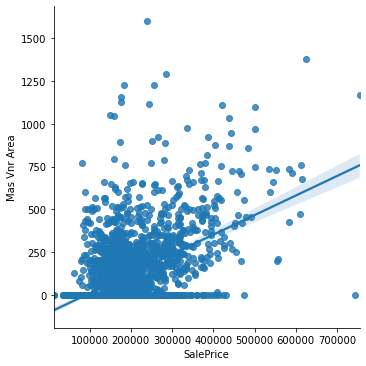

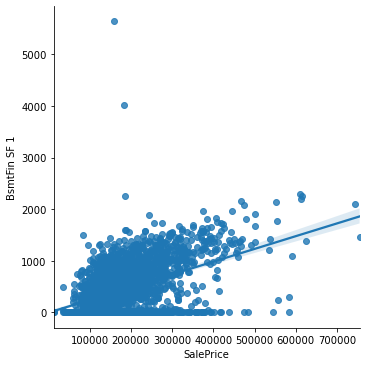

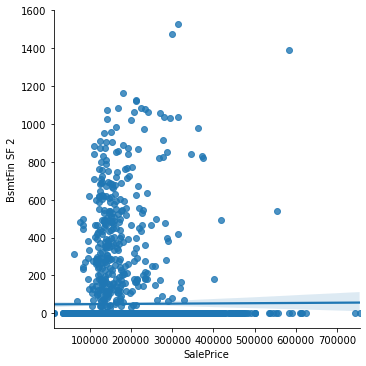

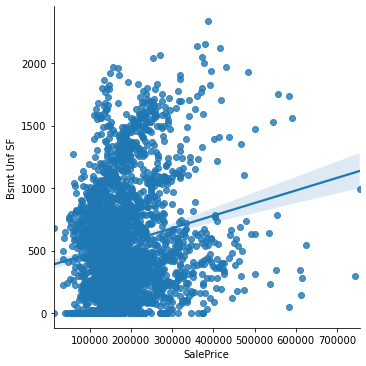

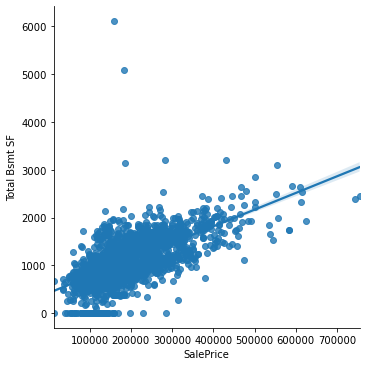

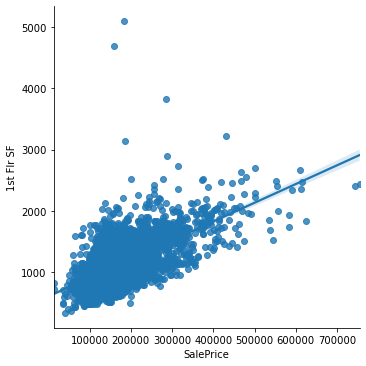

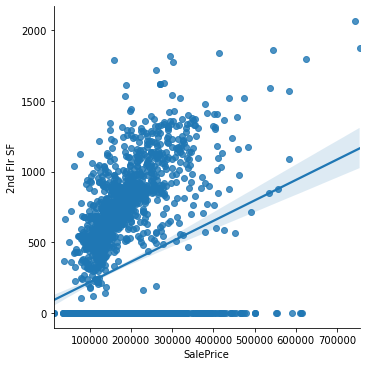

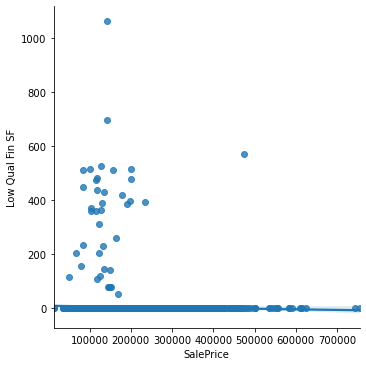

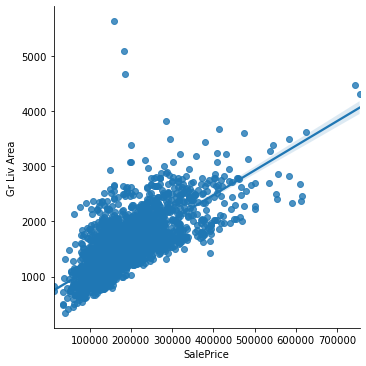

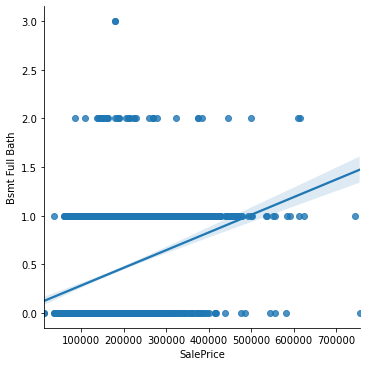

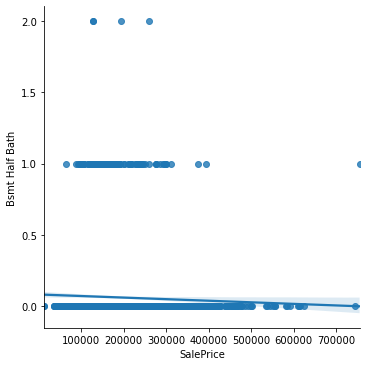

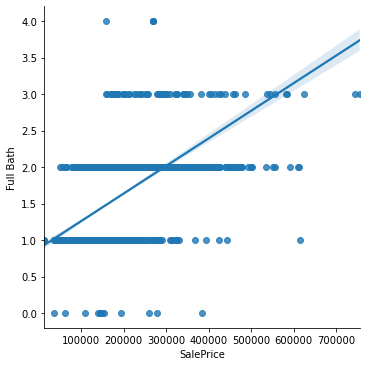

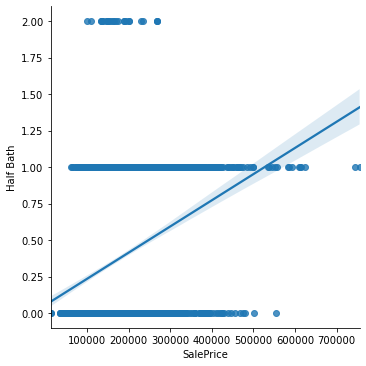

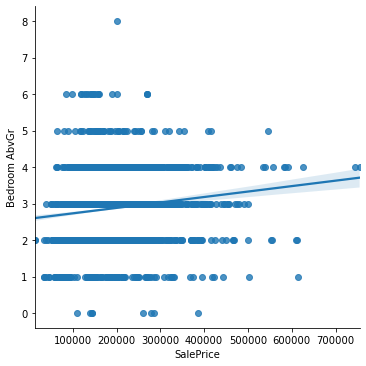

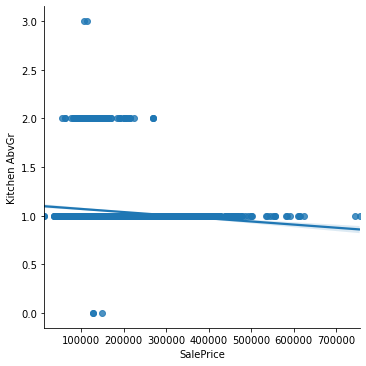

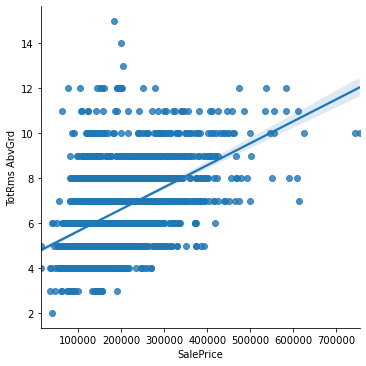

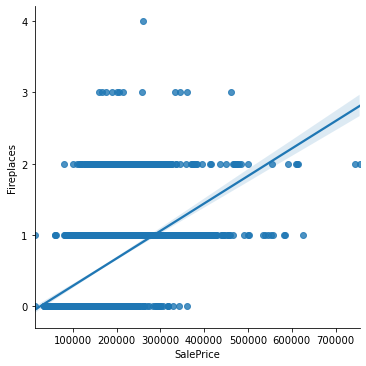

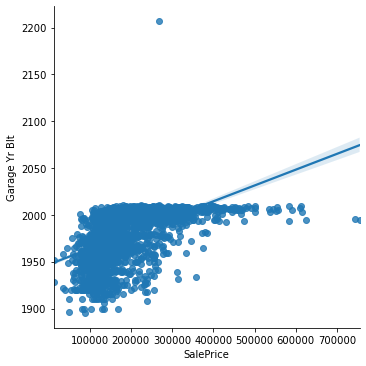

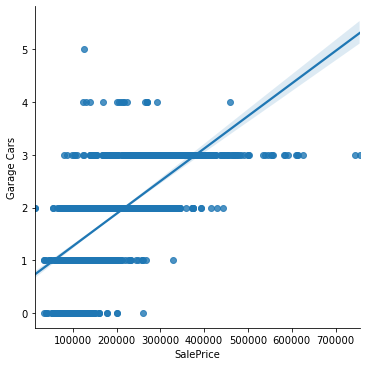

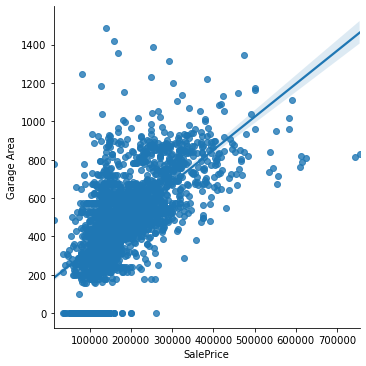

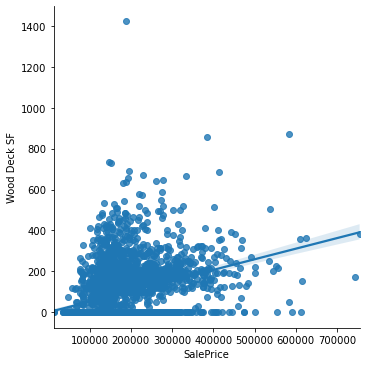

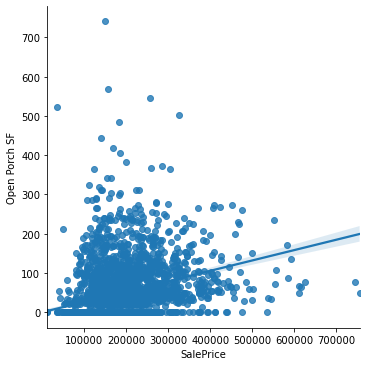

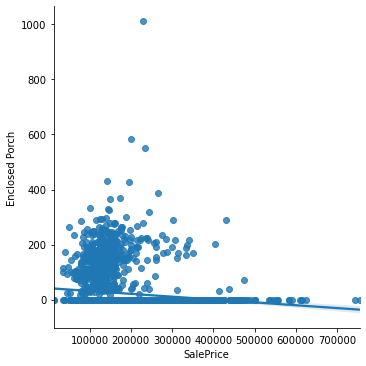

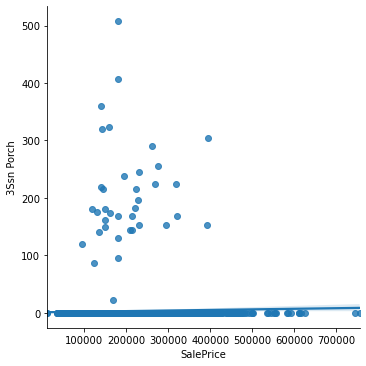

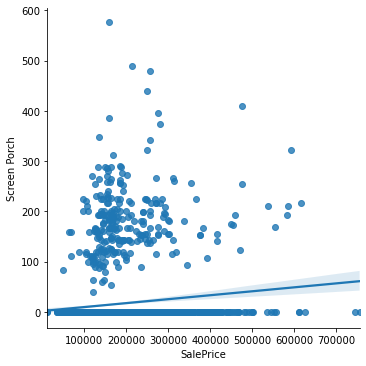

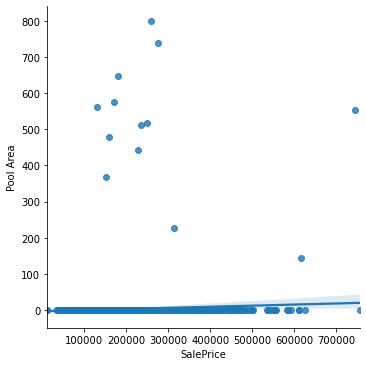

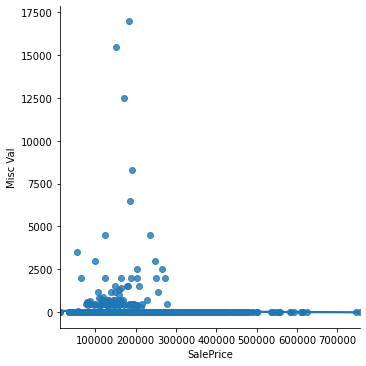

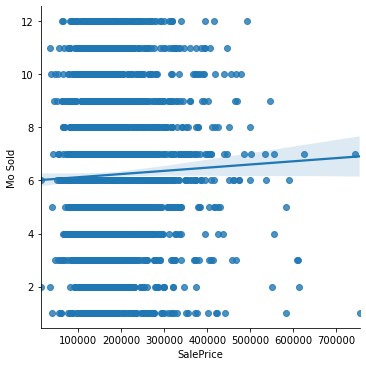

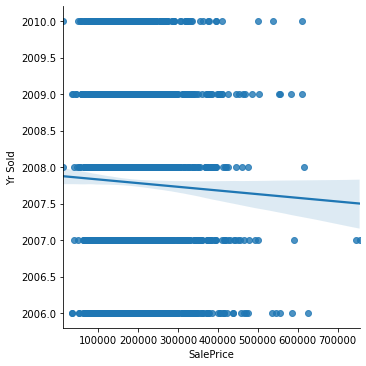

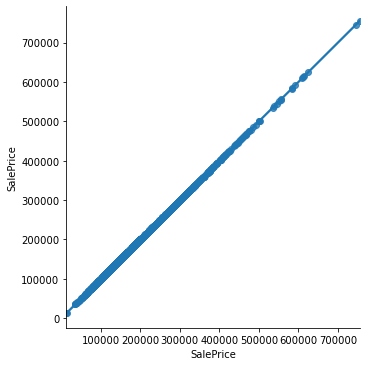

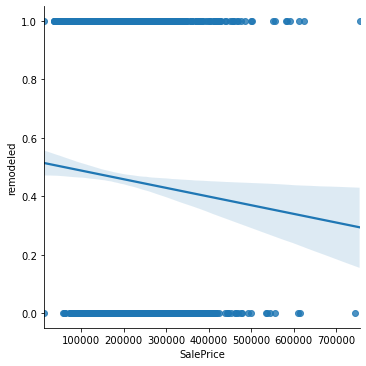

In [203]:
for i in df:
    if df[i].dtype!='object':
        sns.lmplot(x="SalePrice", y=i, data=df)
        plt.show()


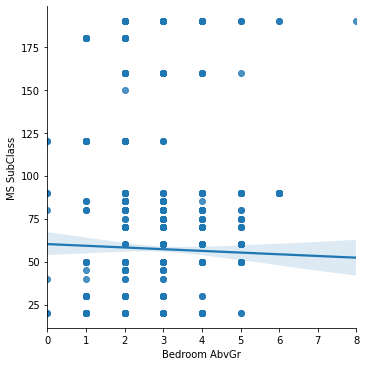

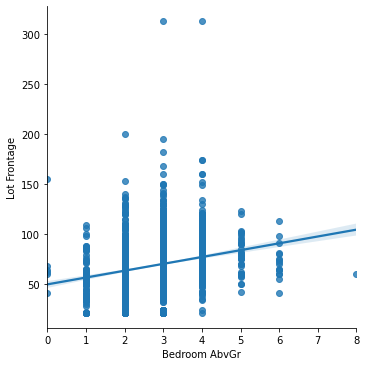

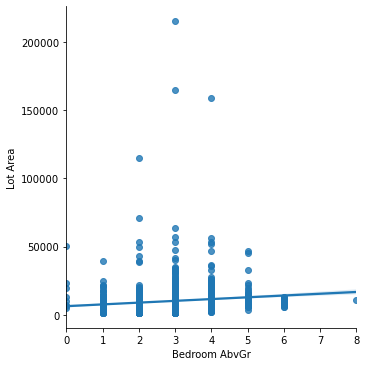

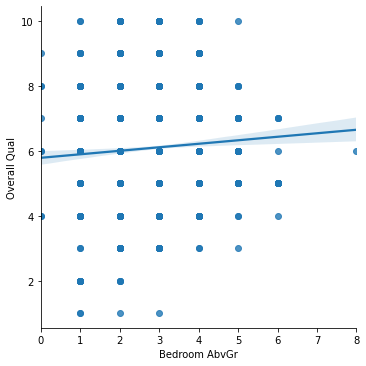

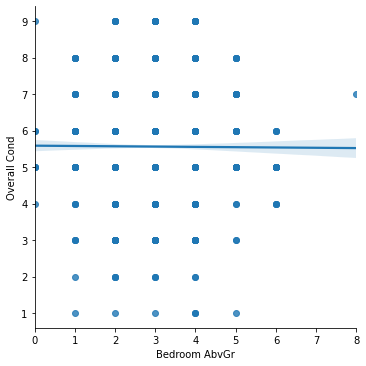

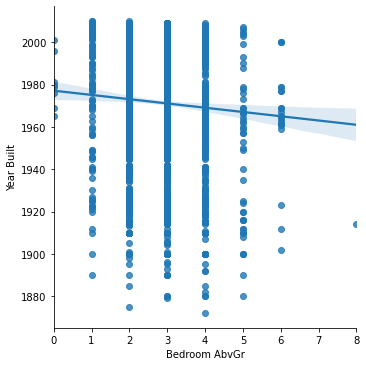

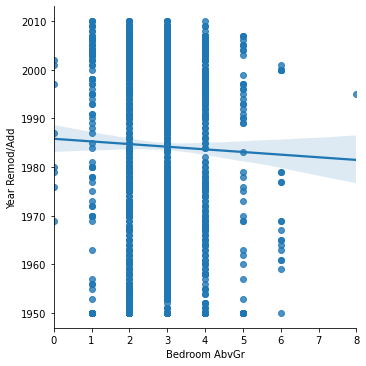

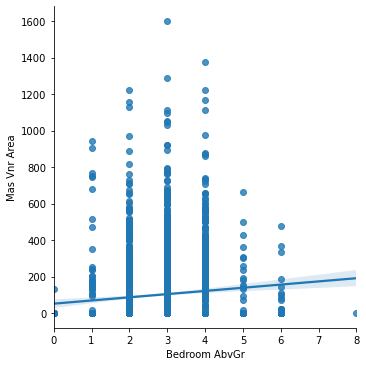

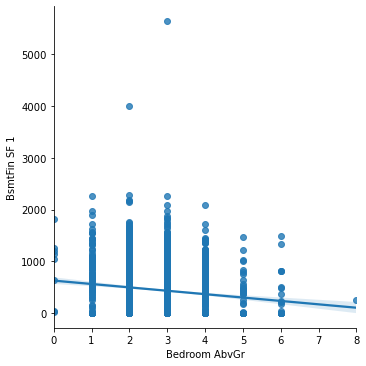

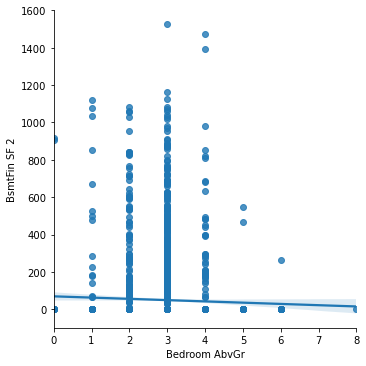

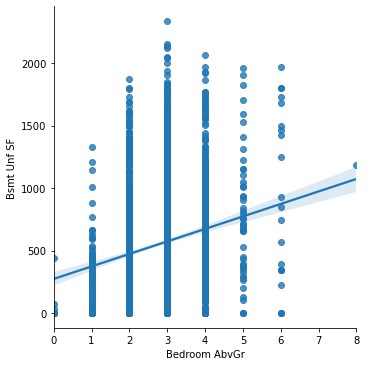

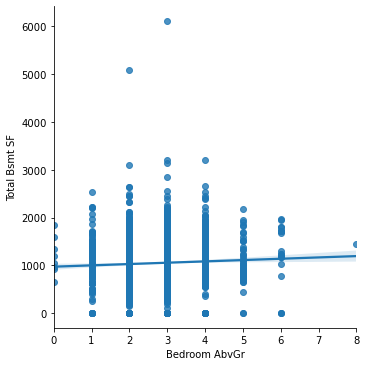

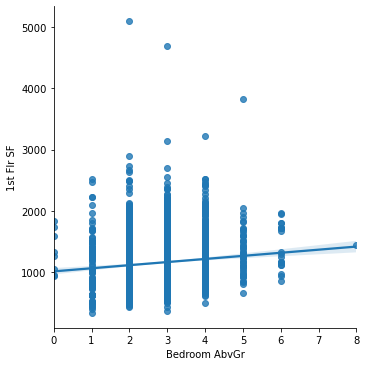

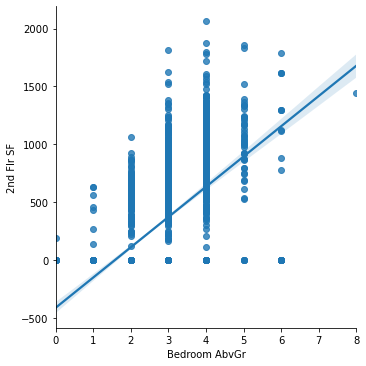

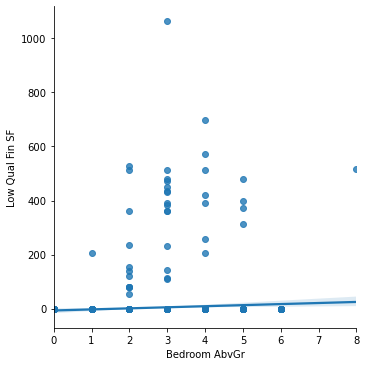

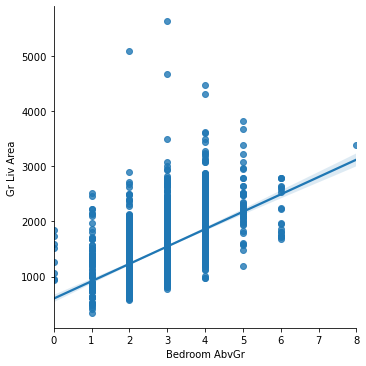

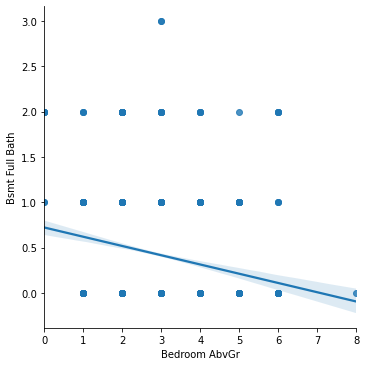

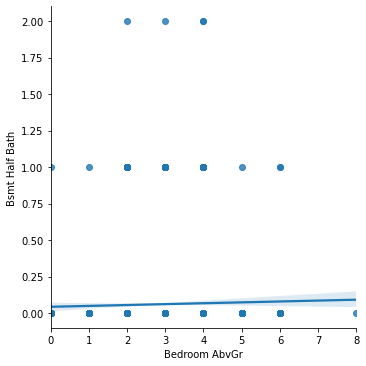

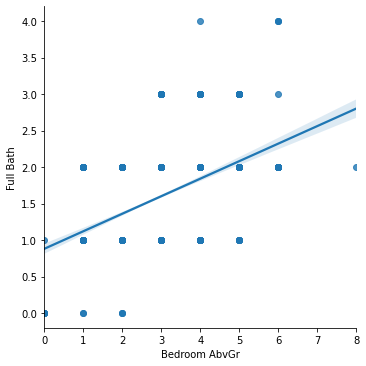

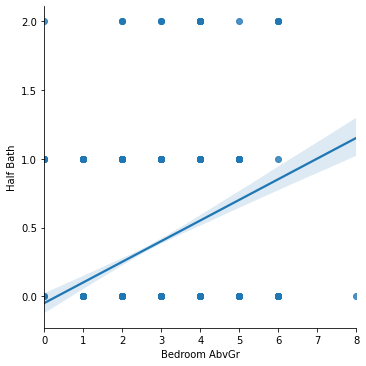

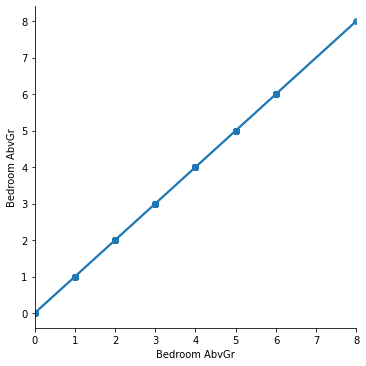

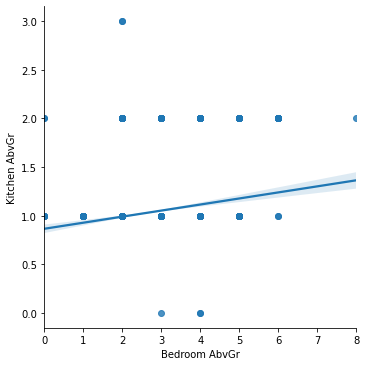

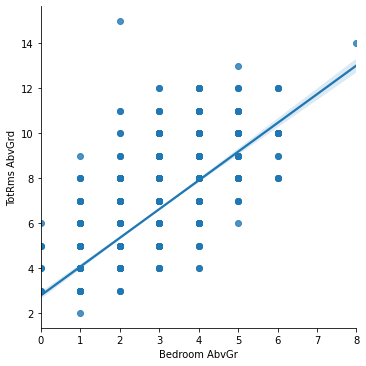

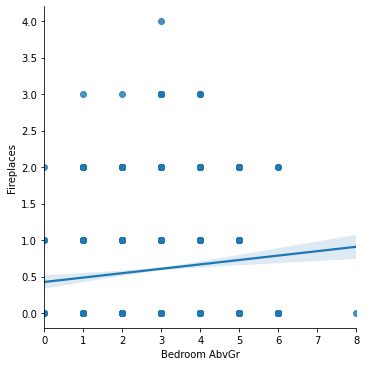

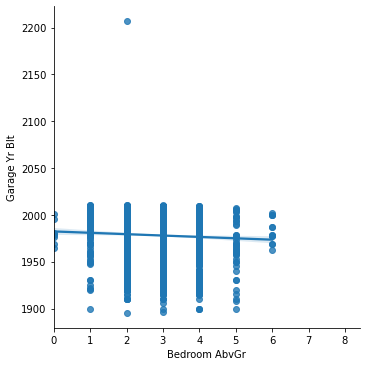

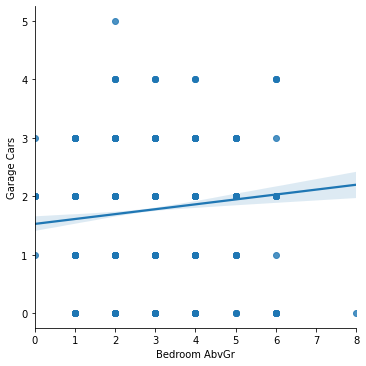

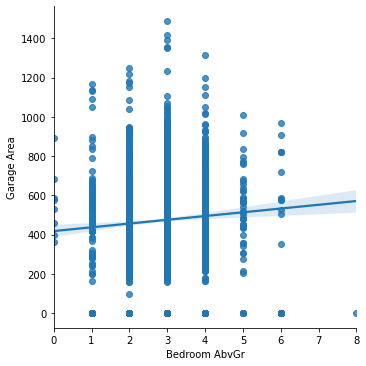

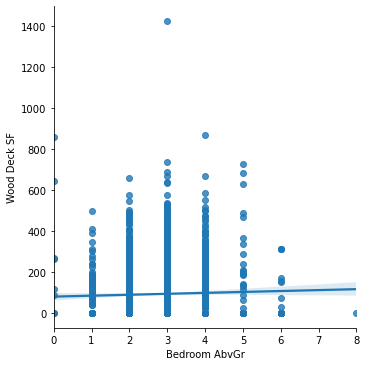

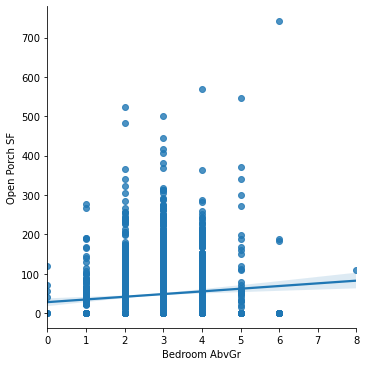

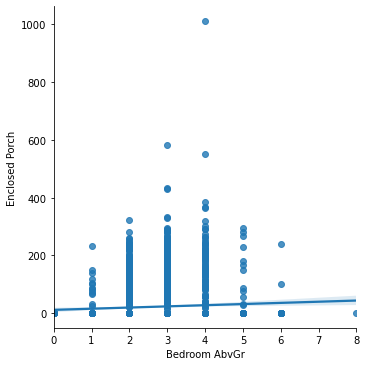

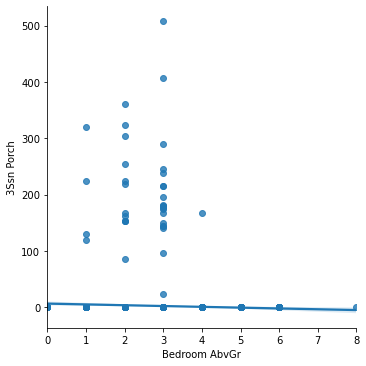

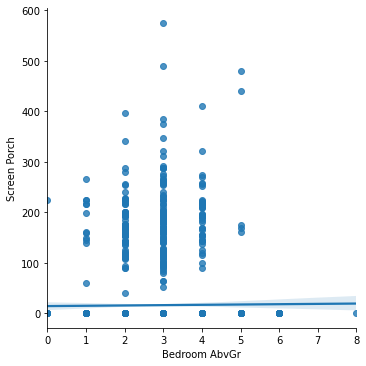

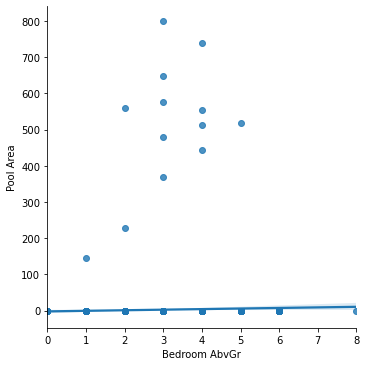

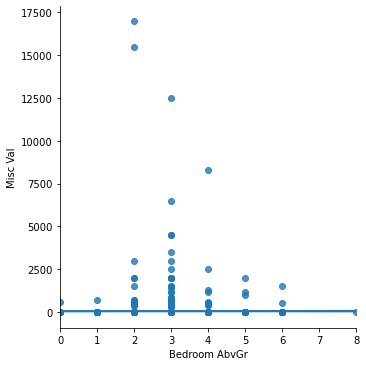

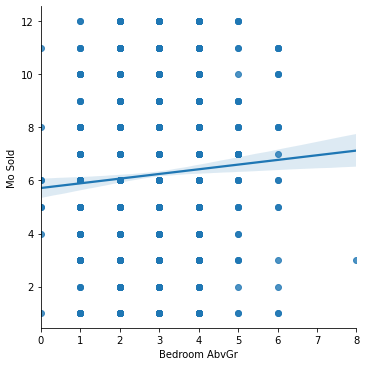

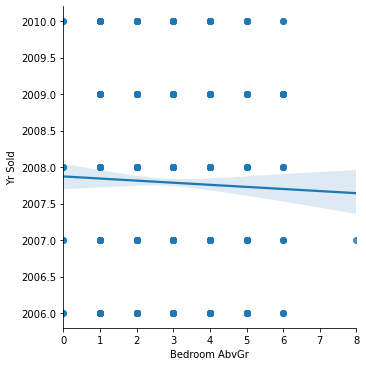

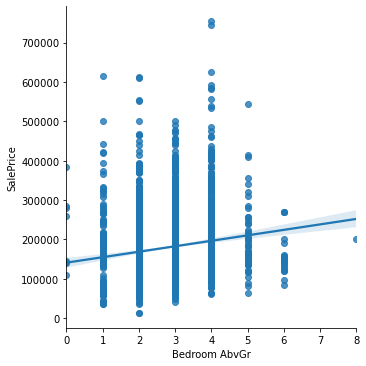

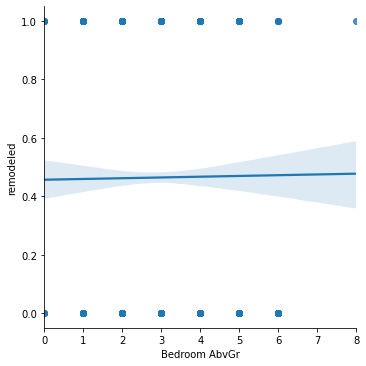

In [206]:
for i in df:
    if df[i].dtype!='object':
        sns.lmplot(x="Bedroom AbvGr", y=i, data=df)
        plt.show()

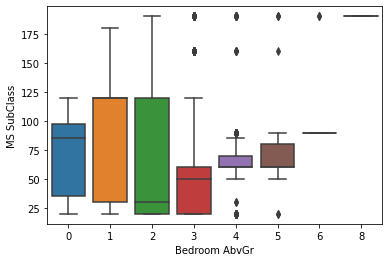

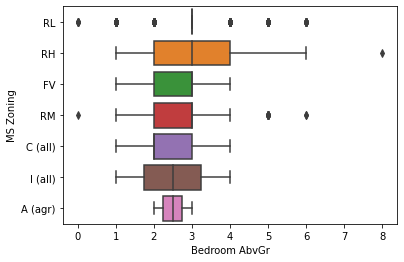

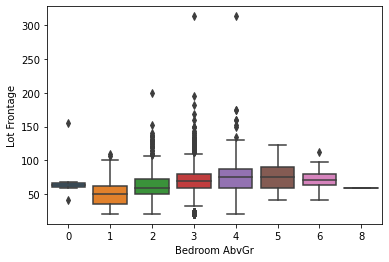

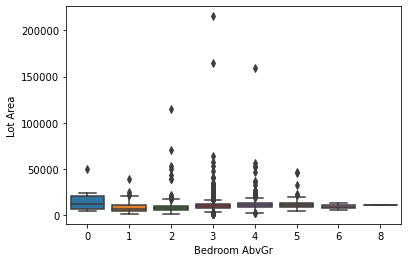

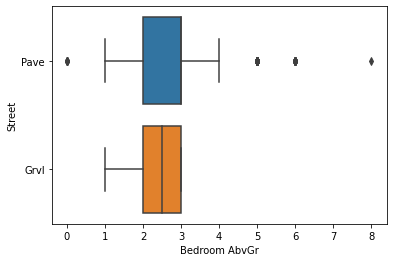

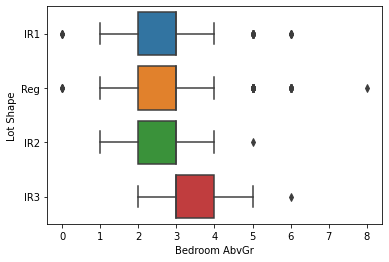

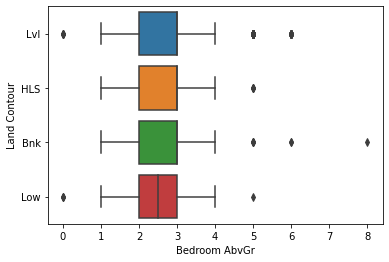

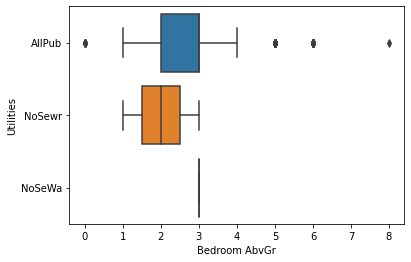

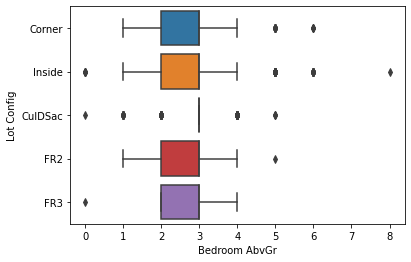

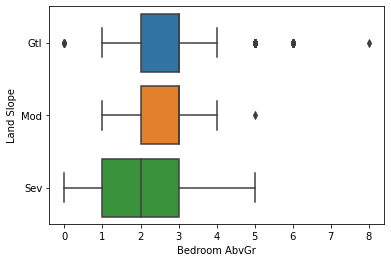

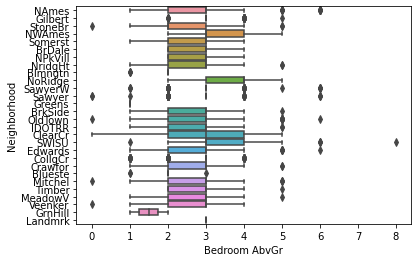

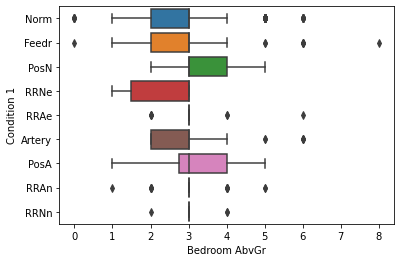

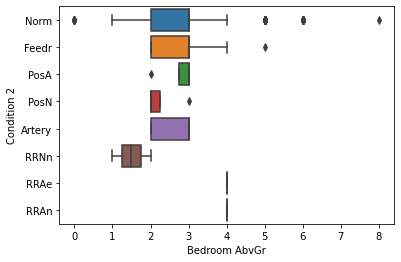

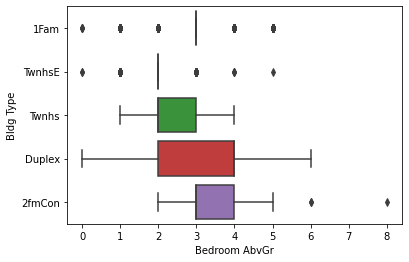

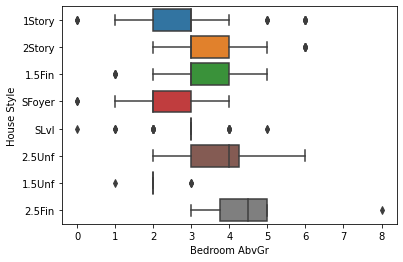

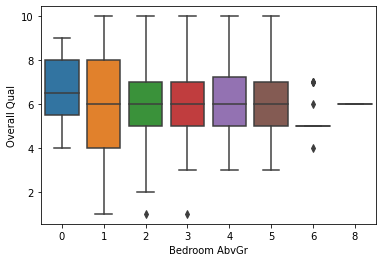

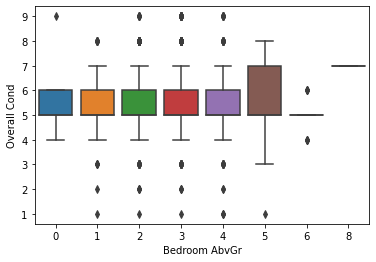

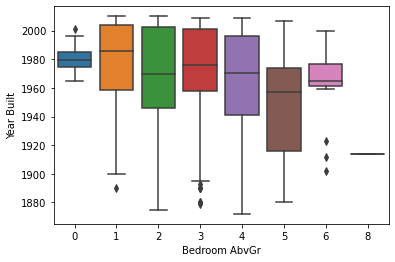

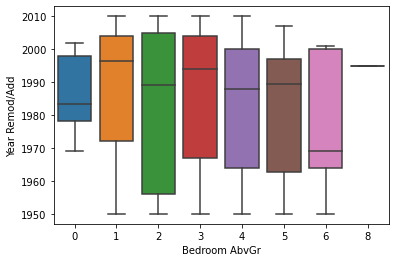

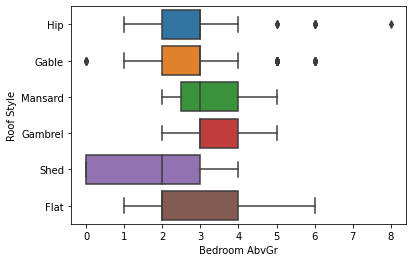

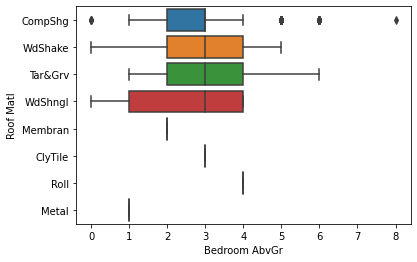

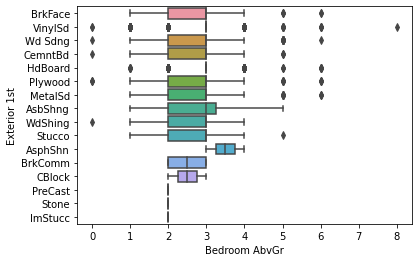

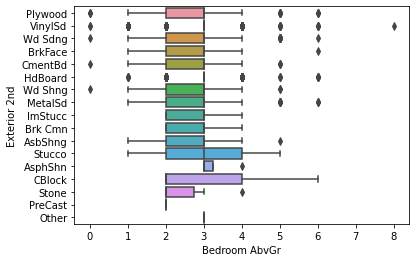

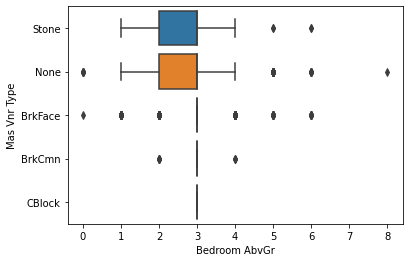

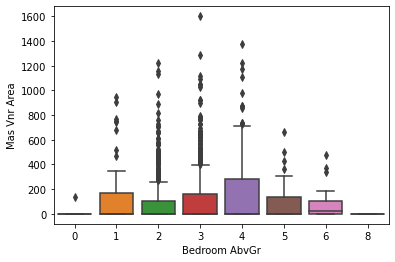

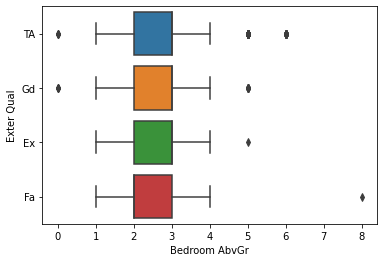

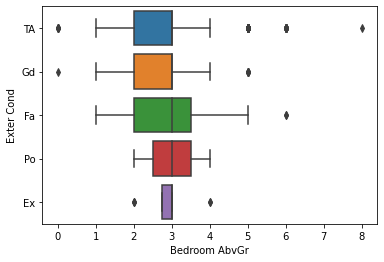

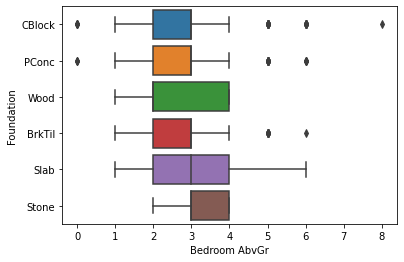

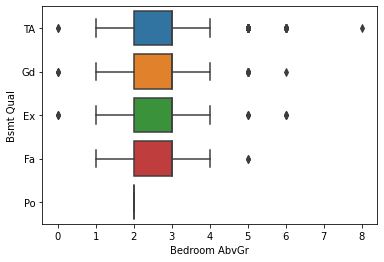

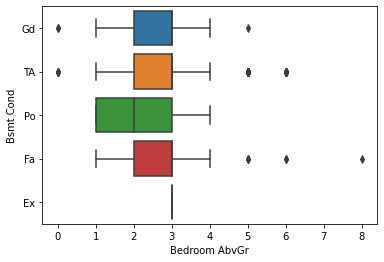

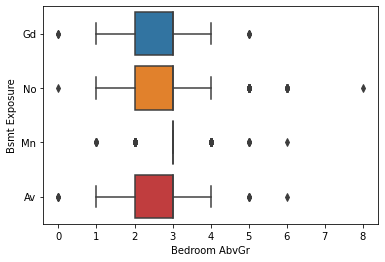

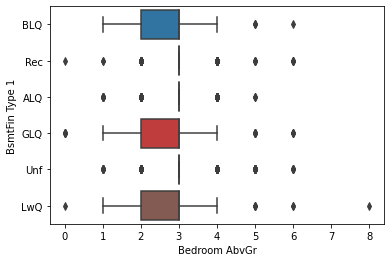

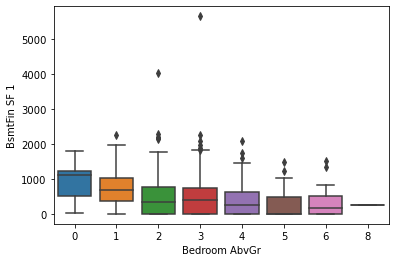

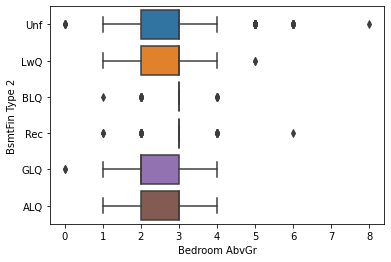

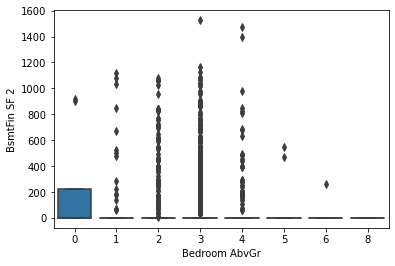

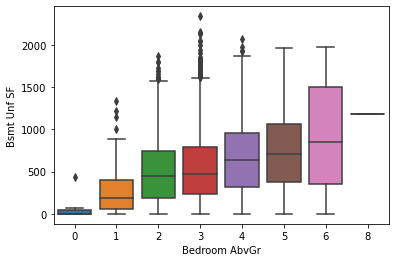

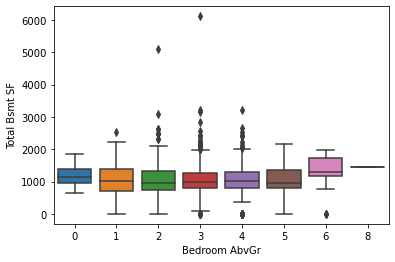

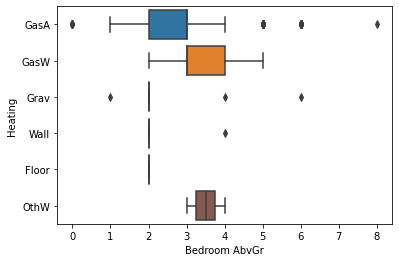

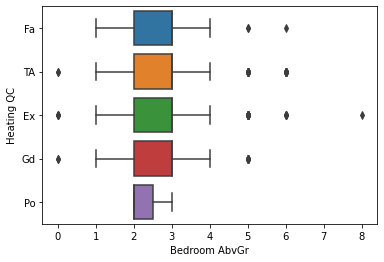

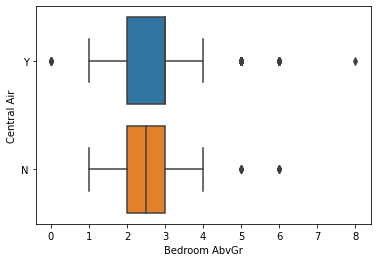

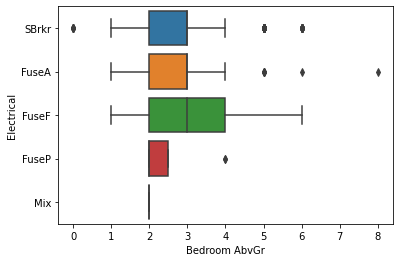

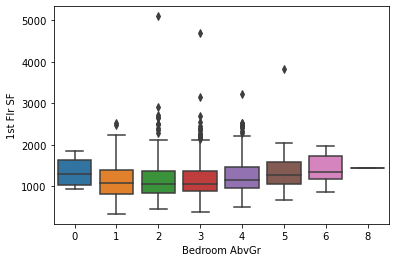

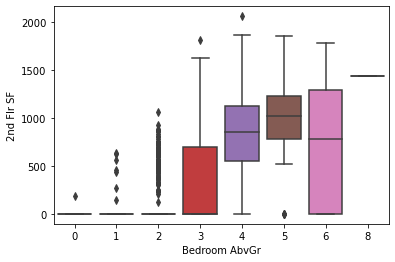

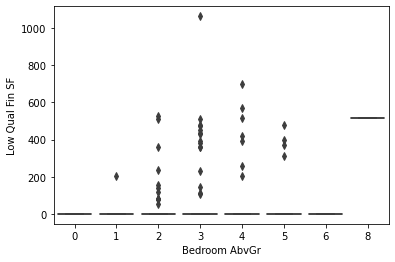

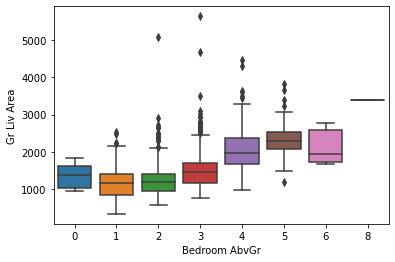

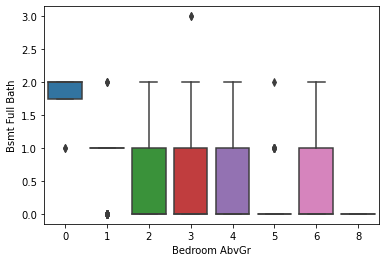

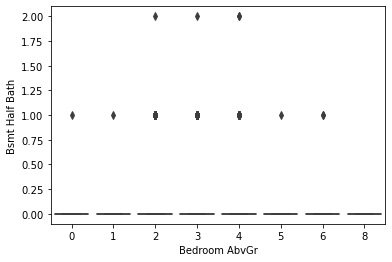

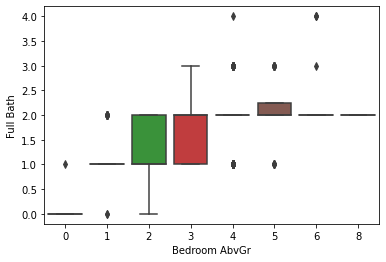

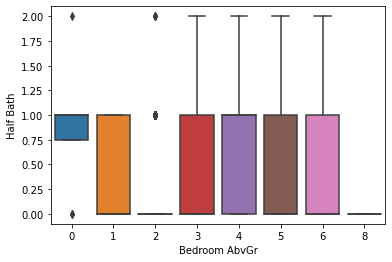

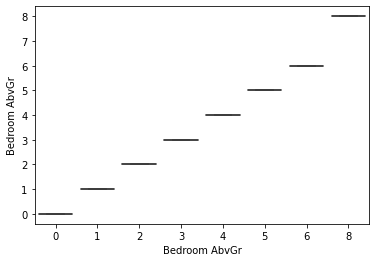

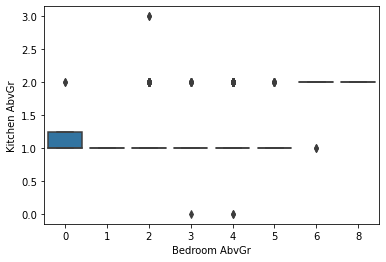

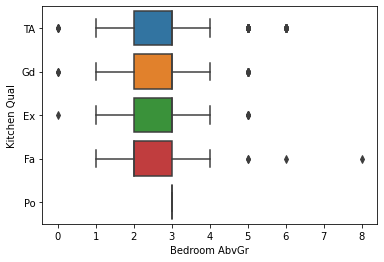

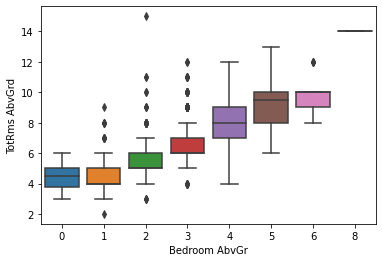

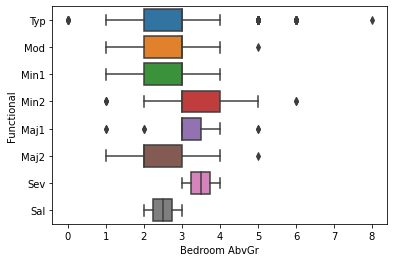

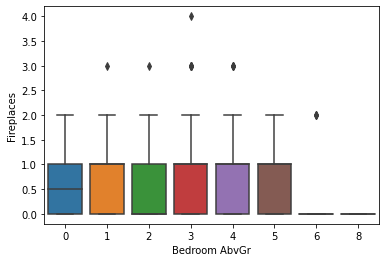

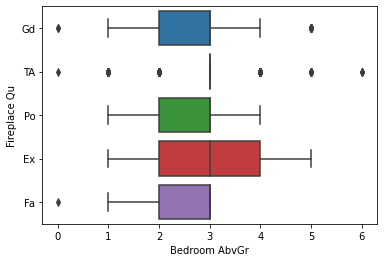

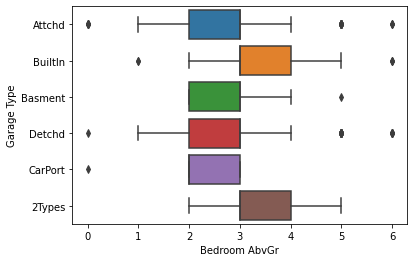

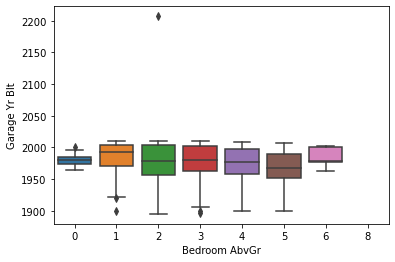

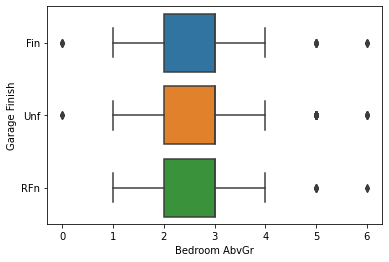

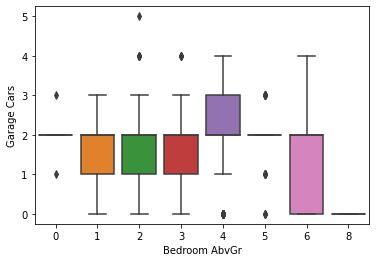

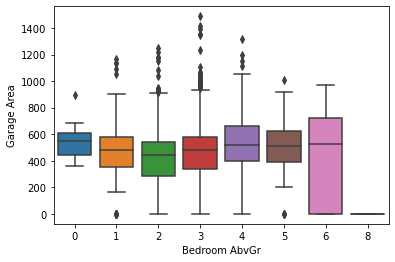

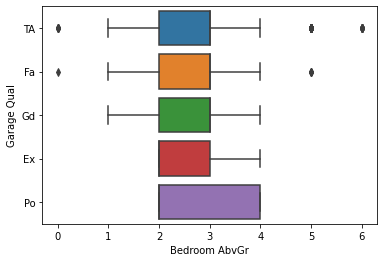

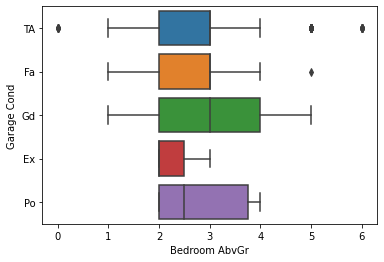

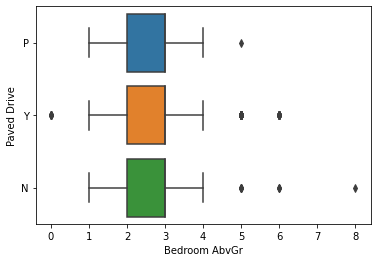

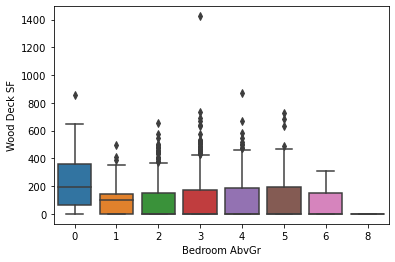

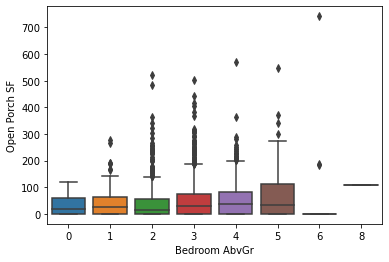

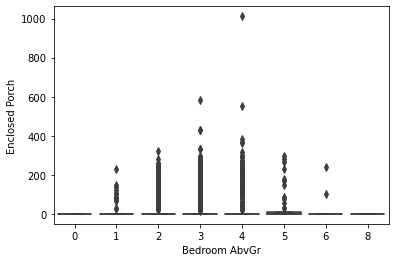

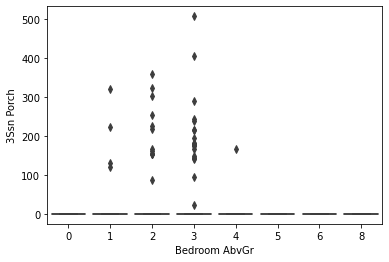

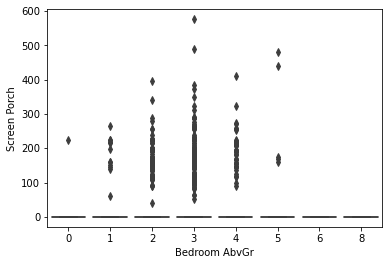

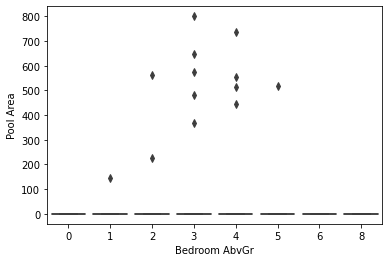

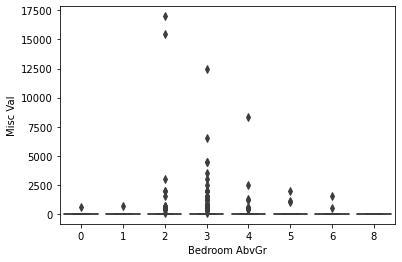

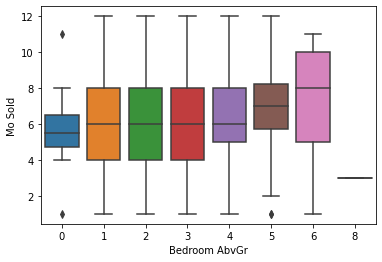

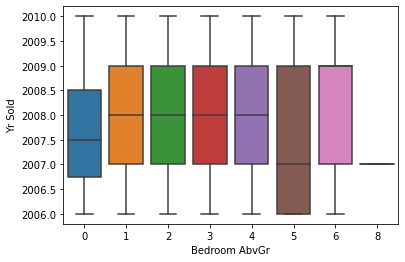

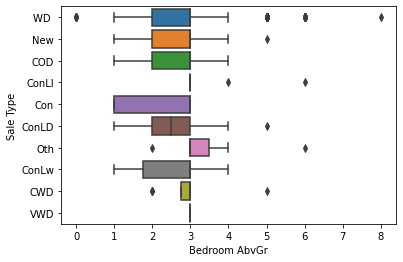

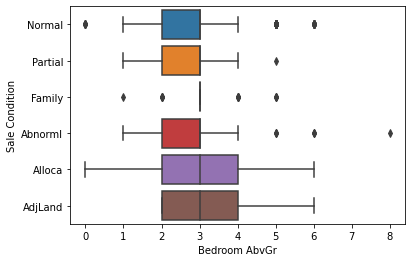

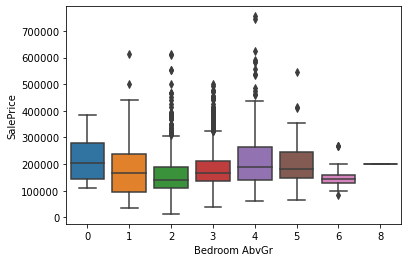

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

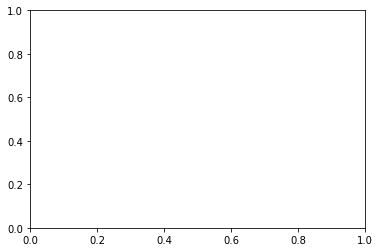

In [218]:
for i in df:
    sns.boxplot(x="Bedroom AbvGr", y=i, data=df)
    plt.show()

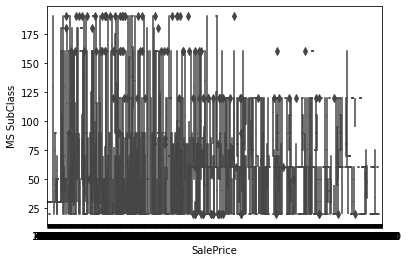

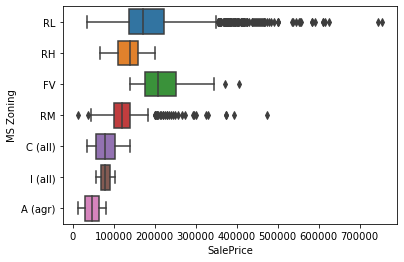

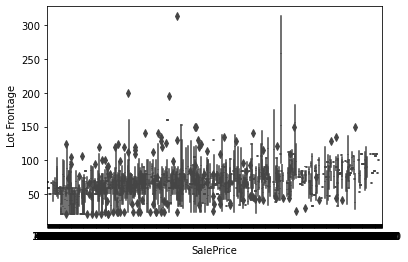

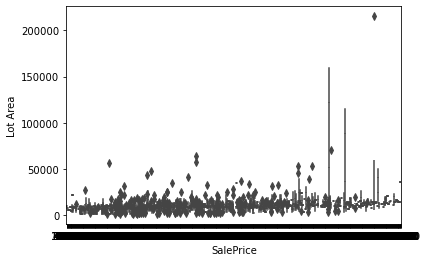

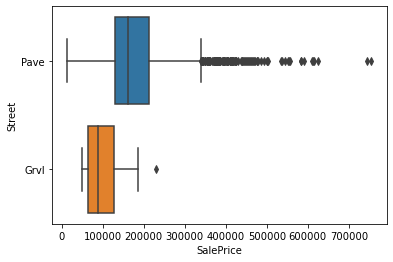

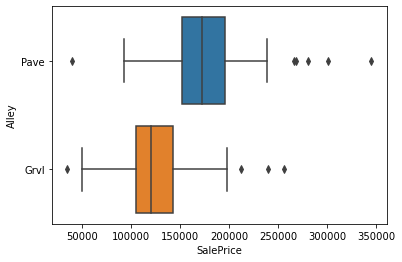

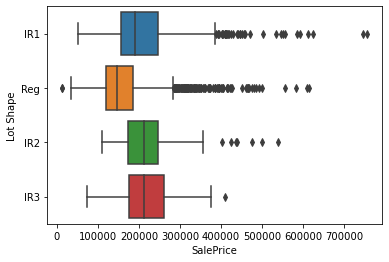

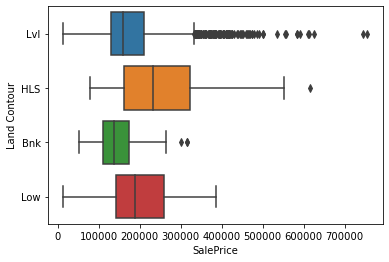

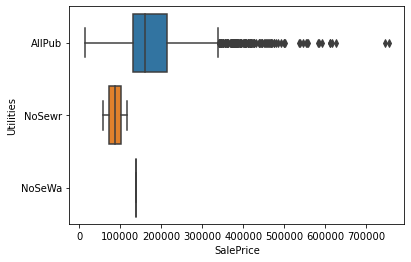

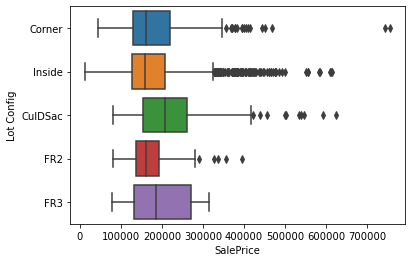

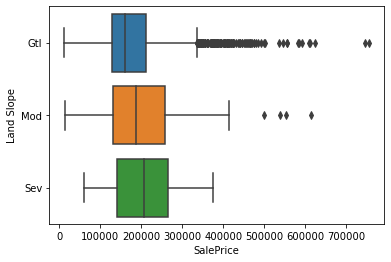

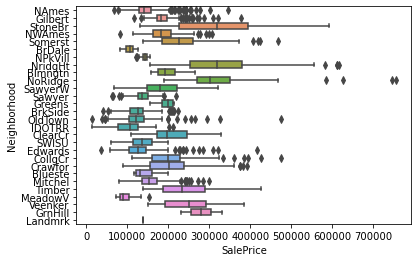

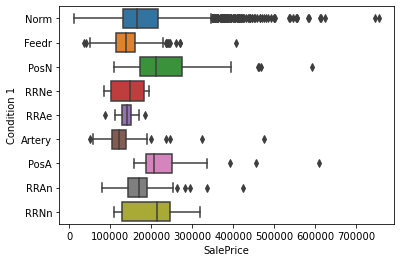

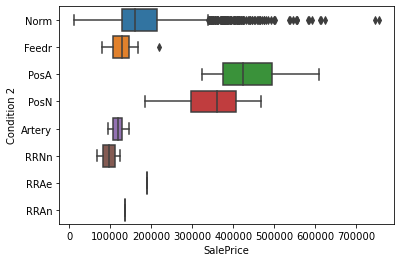

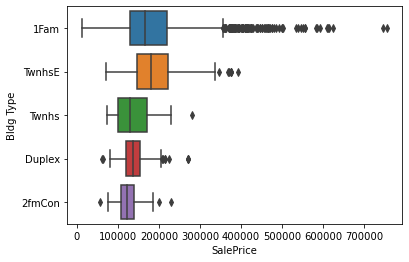

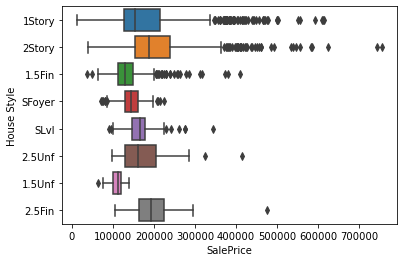

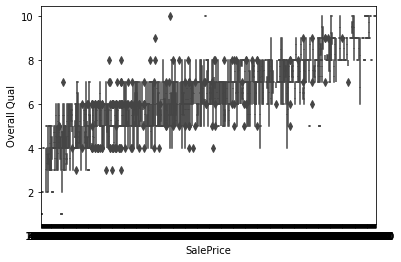

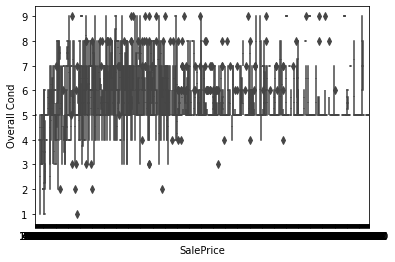

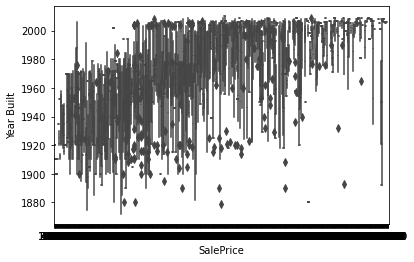

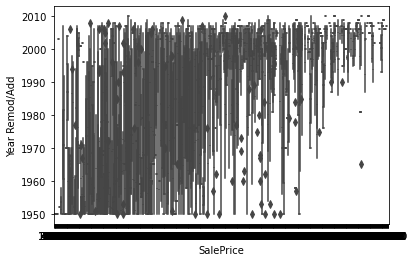

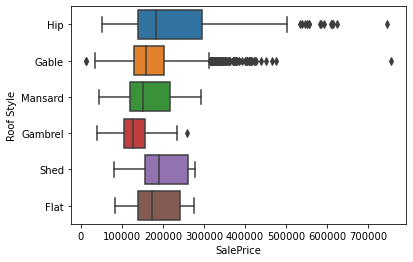

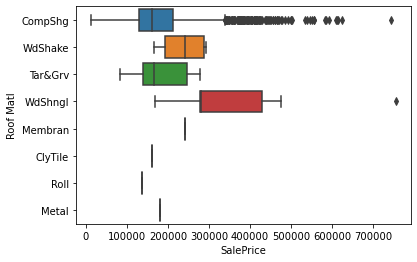

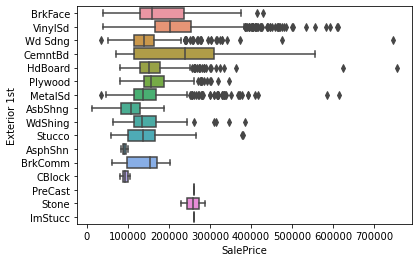

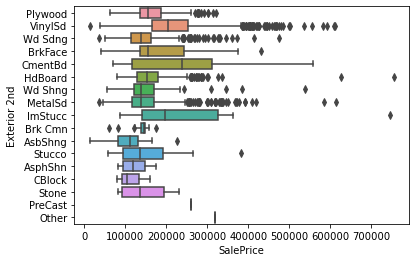

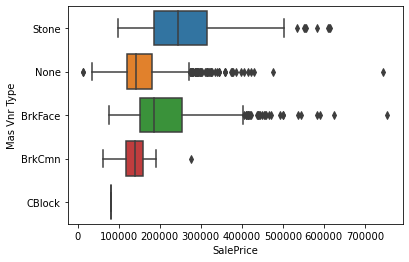

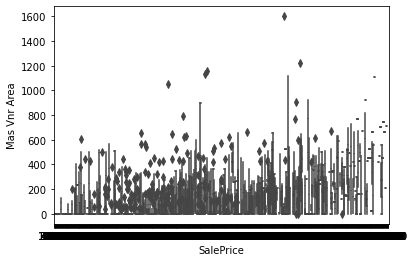

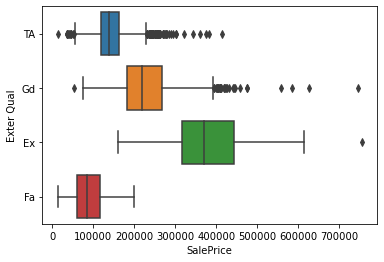

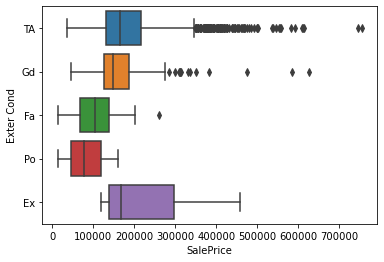

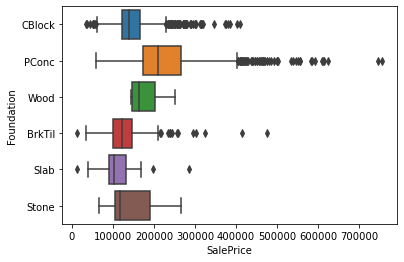

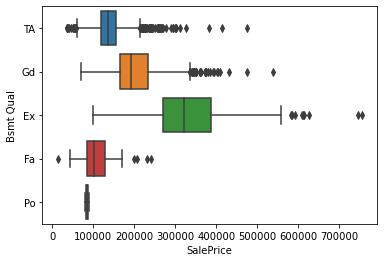

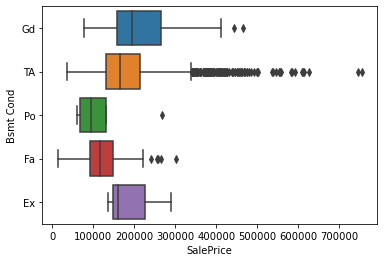

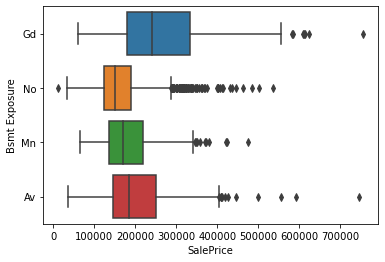

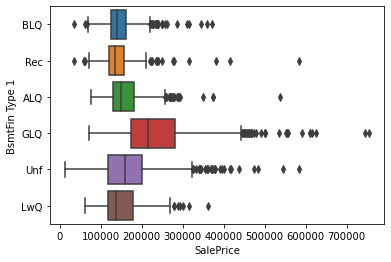

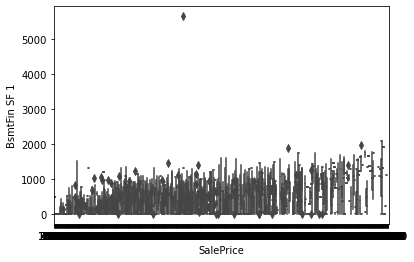

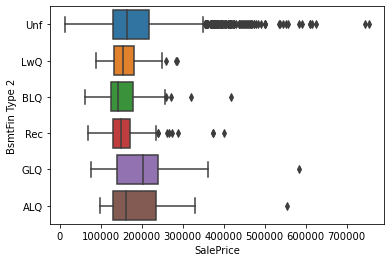

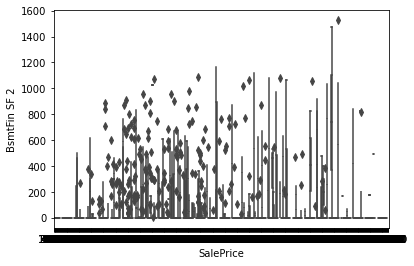

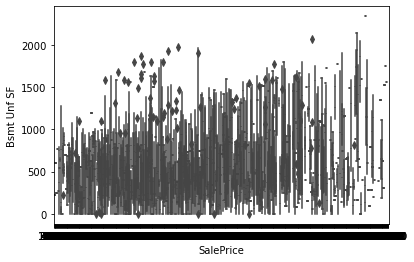

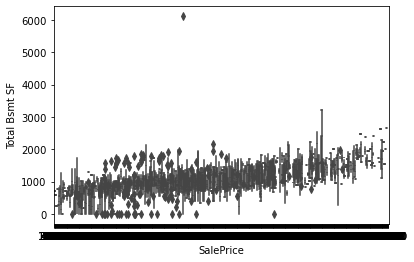

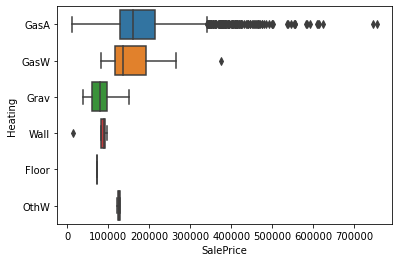

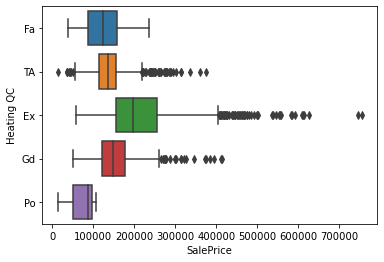

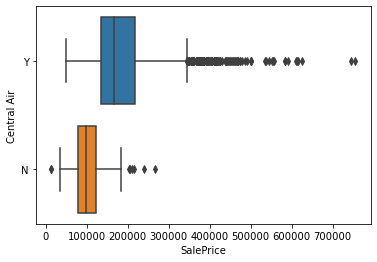

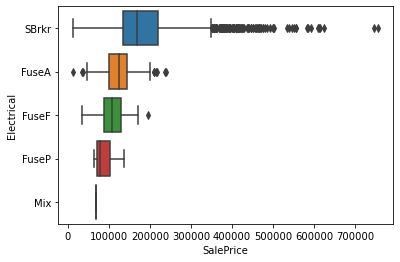

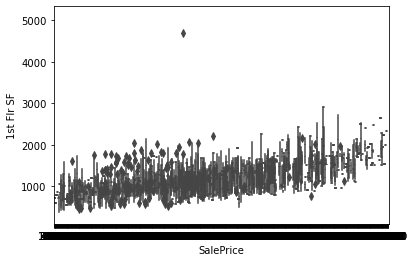

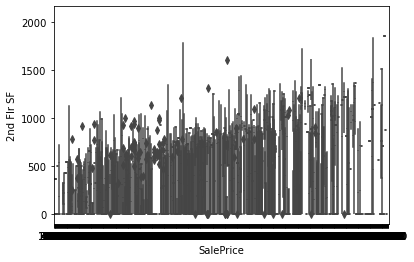

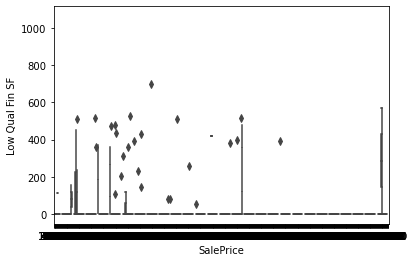

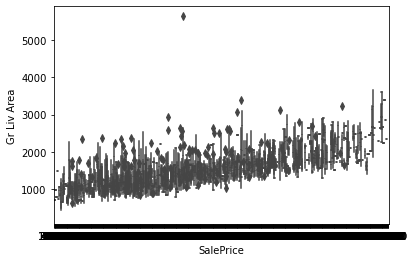

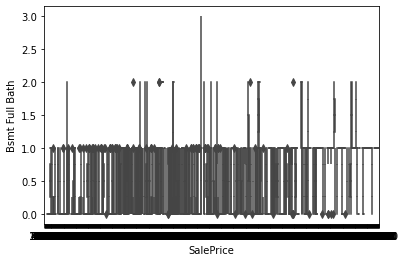

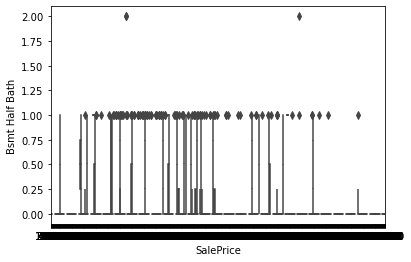

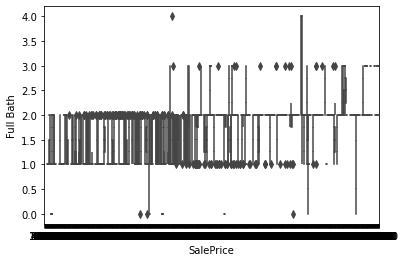

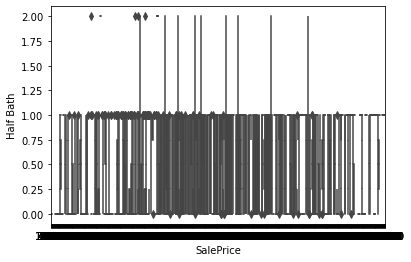

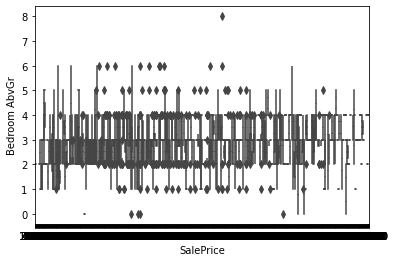

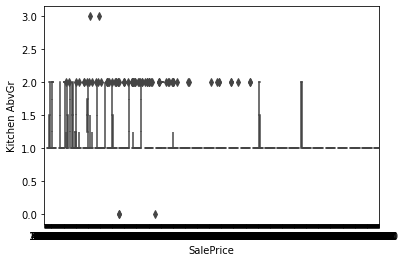

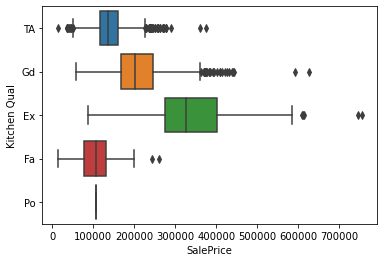

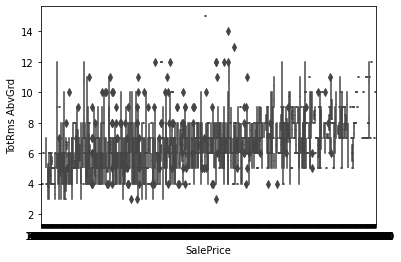

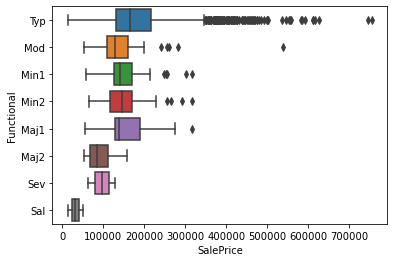

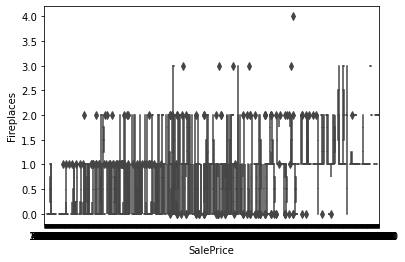

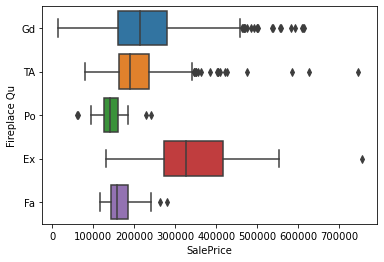

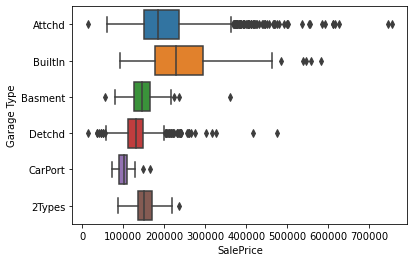

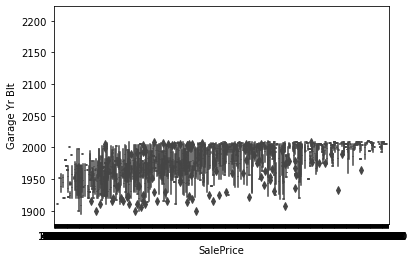

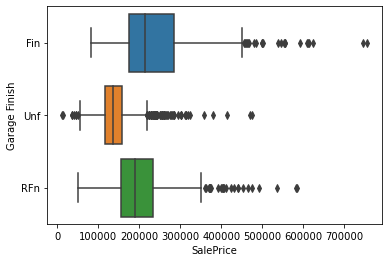

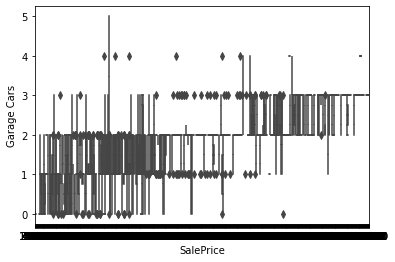

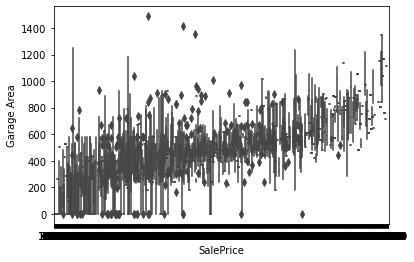

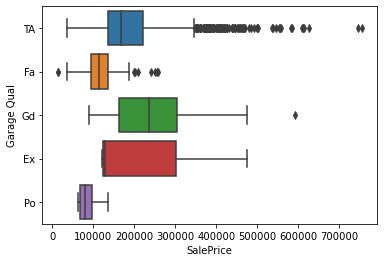

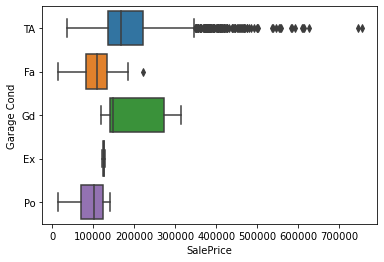

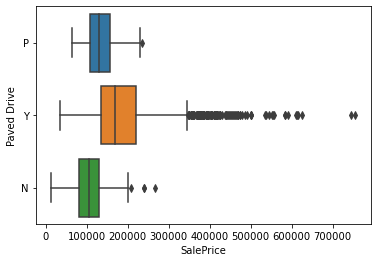

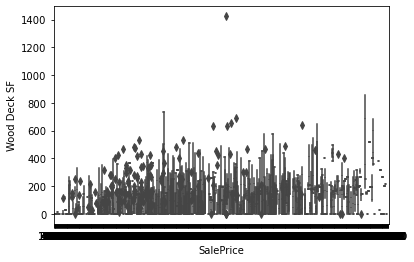

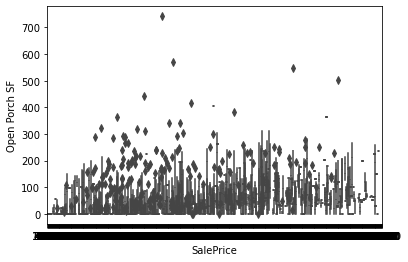

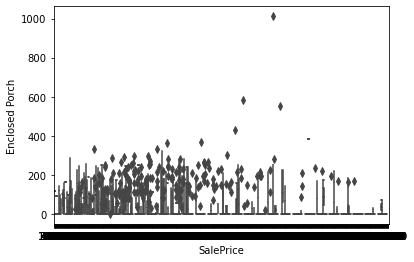

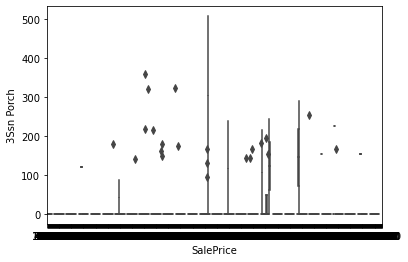

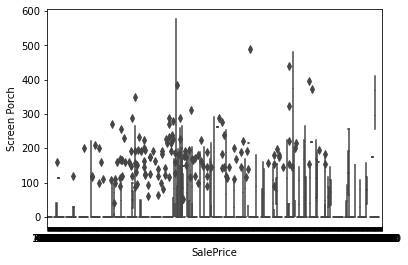

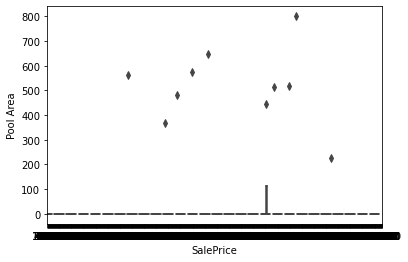

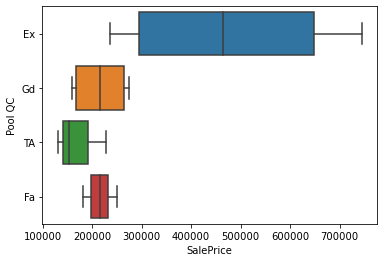

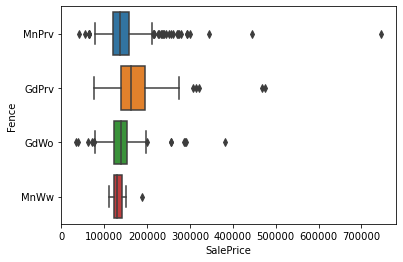

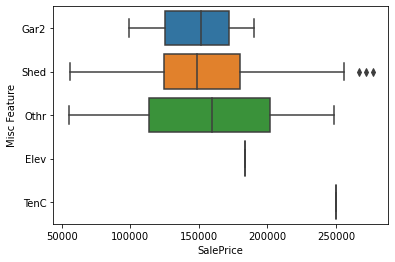

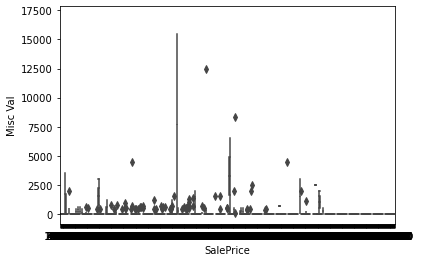

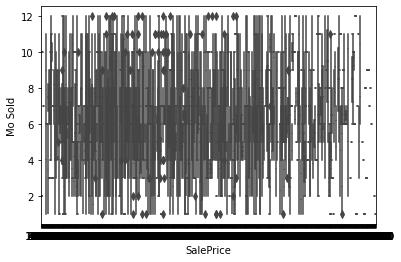

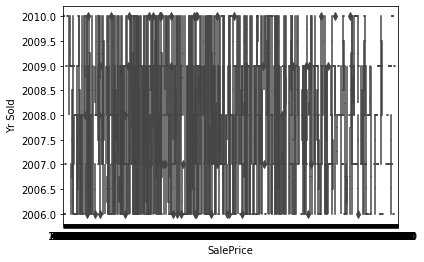

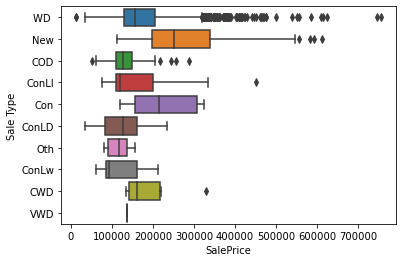

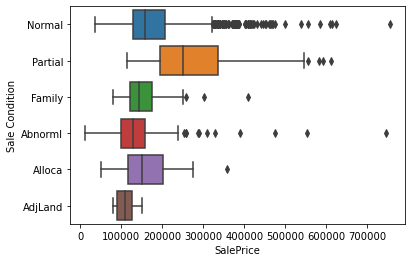

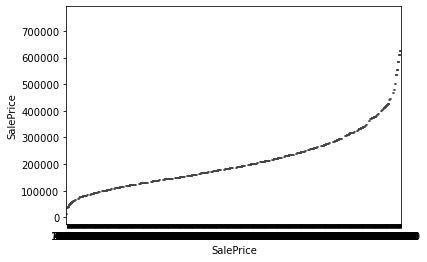

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

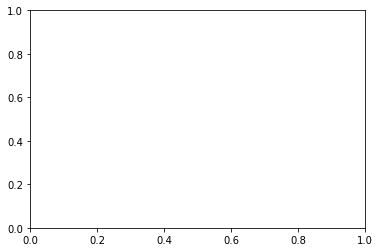

In [6]:
for i in df:
    sns.boxplot(x="SalePrice", y=i, data=df)
    plt.show()

In [31]:
df['Exterior 1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
PreCast       1
Name: Exterior 1st, dtype: int64

In [26]:
normal=['Norm']
positive=['PosN','PosA']

Norm      2900
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

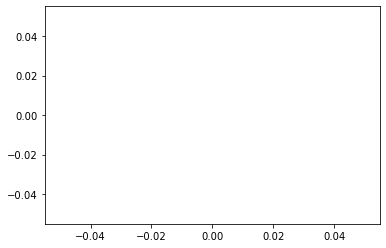

In [20]:
sns.scatterplot(x=df['Land Slope'].value_counts(), y=df['Land Contour'].value_counts(), data=df)
plt.show()

In [ ]:
plt.hist(df['Land Slope'], df['TotRms AbvGrd']], label=['bdrm', 'total'])
plt.legend(loc='upper right')
plt.show()

In [22]:
df['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [21]:
df['Land Contour'].value_counts()

Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64

In [17]:
cormat = df.corr()
round(cormat,2)

MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
MS SubClass             1.00         -0.42     -0.20          0.04   
Lot Frontage           -0.42          1.00      0.49          0.21   
Lot Area               -0.20          0.49      1.00          0.10   
Overall Qual            0.04          0.21      0.10          1.00   
Overall Cond           -0.07         -0.07     -0.03         -0.09   
Year Built              0.04          0.12      0.02          0.60   
Year Remod/Add          0.04          0.09      0.02          0.57   
Mas Vnr Area            0.00          0.22      0.13          0.43   
BsmtFin SF 1           -0.06          0.22      0.19          0.28   
BsmtFin SF 2           -0.07          0.05      0.08         -0.04   
Bsmt Unf SF            -0.13          0.12      0.02          0.27   
Total Bsmt SF          -0.22          0.35      0.25          0.55   
1st Flr SF             -0.25          0.46      0.33          0.48   
2nd Flr SF              0.30          0.03      0.03          0.24   
Low Qual Fin SF         0.03          0.01      0.00         -0.05   
Gr Liv Area             0.07          0.38      0.29          0.57   
Bsmt Full Bath          0.01          0.11      0.13          0.17   
Bsmt Half Bath         -0.00         -0.02      0.03         -0.04   
Full Bath               0.13          0.18      0.13          0.52   
Half Bath               0.18          0.04      0.04          0.27   
Bedroom AbvGr          -0.02          0.24      0.14          0.06   
Kitchen AbvGr           0.26          0.01     -0.02         -0.16   
TotRms AbvGrd           0.03          0.35      0.22          0.38   
Fireplaces             -0.05          0.26      0.26          0.39   
Garage Yr Blt           0.09          0.08     -0.01          0.57   
Garage Cars            -0.05          0.31      0.18          0.60   
Garage Area            -0.10          0.36      0.21          0.56   
Wood Deck SF           -0.02          0.12      0.16          0.26   
Open Porch SF          -0.01          0.16      0.10          0.30   
Enclosed Porch         -0.02          0.01      0.02         -0.14   
3Ssn Porch             -0.04          0.03      0.02          0.02   
Screen Porch           -0.05          0.08      0.06          0.04   
Pool Area              -0.00          0.17      0.09          0.03   
Misc Val               -0.03          0.04      0.07          0.01   
Mo Sold                 0.00          0.01      0.00          0.03   
Yr Sold                -0.02         -0.01     -0.02         -0.02   
SalePrice              -0.09          0.36      0.27          0.80   
remodeled              -0.05         -0.04      0.00         -0.09   

                 Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
MS SubClass             -0.07        0.04            0.04          0.00   
Lot Frontage            -0.07        0.12            0.09          0.22   
Lot Area                -0.03        0.02            0.02          0.13   
Overall Qual            -0.09        0.60            0.57          0.43   
Overall Cond             1.00       -0.37            0.05         -0.14   
Year Built              -0.37        1.00            0.61          0.31   
Year Remod/Add           0.05        0.61            1.00          0.20   
Mas Vnr Area            -0.14        0.31            0.20          1.00   
BsmtFin SF 1            -0.05        0.28            0.15          0.30   
BsmtFin SF 2             0.04       -0.03           -0.06         -0.02   
Bsmt Unf SF             -0.14        0.13            0.16          0.09   
Total Bsmt SF           -0.17        0.41            0.30          0.40   
1st Flr SF              -0.16        0.31            0.24          0.40   
2nd Flr SF               0.01        0.02            0.16          0.12   
Low Qual Fin SF          0.01       -0.14           -0.06         -0.06   
Gr Liv Area             -0.12        0.24            0.32          0.40   
Bsmt Full B

In [1]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sn.heatmap(corrmat,annot=True)
plt.show()

NameError: name 'plt' is not defined

In [24]:
df[(df['Garage Yr Blt']- df['Year Built'])>0][['Garage Yr Blt','Year Built']]

Garage Yr Blt  Year Built
30           1997.0        1971
37           2008.0        2007
38           2010.0        2009
45           2010.0        2009
65           1996.0        1995
...             ...         ...
2873         1950.0        1926
2878         1994.0        1920
2880         1958.0        1949
2890         1989.0        1988
2928         1975.0        1974

[526 rows x 2 columns]

In [25]:
df[(df['Garage Yr Blt']- df['Year Built'])==0][['Garage Yr Blt','Year Built']]

Garage Yr Blt  Year Built
0            1960.0        1960
1            1961.0        1961
2            1958.0        1958
3            1968.0        1968
4            1997.0        1997
...             ...         ...
2923         1977.0        1977
2924         1960.0        1960
2925         1984.0        1984
2926         1983.0        1983
2929         1993.0        1993

[2227 rows x 2 columns]

In [27]:
len(df[(df['Garage Yr Blt']- df['Year Built'])<0][['Garage Yr Blt','Year Built']])

18

In [28]:
df['age']=df['Yr Sold']-df['Year Built']

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           20        RL         141.0     31770   Pave       IR1   
1           20        RH          80.0     11622   Pave       Reg   
2           20        RL          81.0     14267   Pave       IR1   
3           20        RL          93.0     11160   Pave       Reg   
4           60        RL          74.0     13830   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
1          Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
2          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
3          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
4          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      1Story             6             5        1960   
1        Norm      1Fam      1Story             5             6        1961   
2        Norm      1Fam      1Story             6             6        1958   
3        Norm      1Fam      1Story             7             5        1968   
4        Norm      1Fam      2Story             5             5        1997   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1960        Hip   CompShg      BrkFace      Plywood        Stone   
1            1961      Gable   CompShg      VinylSd      VinylSd         None   
2            1958        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
3            1968        Hip   CompShg      BrkFace      BrkFace         None   
4            1998      Gable   CompShg      VinylSd      VinylSd         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         112.0         TA         TA     CBlock        TA        Gd   
1           0.0         TA         TA     CBlock        TA        TA   
2         108.0         TA         TA     CBlock        TA        TA   
3           0.0         Gd         TA     CBlock        TA        TA   
4           0.0         TA         TA      PConc        Gd        TA   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            Gd            BLQ         639.0            Unf           0.0   
1            No            Rec         468.0            LwQ         144.0   
2            No            ALQ         923.0            Unf           0.0   
3            No            ALQ        1065.0            Unf           0.0   
4            No            GLQ         791.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        441.0         1080.0    GasA         Fa           Y      SBrkr   
1        270.0          882.0    GasA         TA           Y      SBrkr   
2        406.0         1329.0    GasA         TA           Y      SBrkr   
3       1045.0         2110.0    GasA         Ex           Y      SBrkr   
4        137.0          928.0    GasA         Gd           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0        1656           0                0         1656             1.0   
1         896           0                0          896             0.0   
2        1329           0                0         1329             0.0   
3        2110           0                0         2110             1.0   
4         928         701                0         1629             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          1          0              3              1   
1             0.0          1          0              2              1   
2             0.0          1          1              3              1   
3             0.0          2          1              3              1   
4           

In [48]:
df.to_csv('Ames_data_8_4_21.csv')

In [51]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [52]:
df_dummies.drop(columns='MS SubClass',inplace=True)

In [53]:
df_dummies.to_csv('AmesDummyData_8_4_21.csv')

In [54]:
df_dummies.isna().sum()

Lot Frontage                                       0
Lot Area                                           0
Overall Qual                                       0
Overall Cond                                       0
Year Built                                         0
                                                  ..
ms_type_2-STORY PUD - 1946 & NEWER                 0
ms_type_DUPLEX - ALL STYLES AND AGES               0
ms_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER    0
ms_type_SPLIT FOYER                                0
ms_type_SPLIT OR MULTI-LEVEL                       0
Length: 279, dtype: int64

In [42]:
df.describe()

MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2930.000000   2440.000000    2930.000000   2930.000000   2930.000000   
mean     57.387372     69.224590   10147.921843      6.094881      5.563140   
std      42.638025     23.365335    7880.017759      1.411026      1.111537   
min      20.000000     21.000000    1300.000000      1.000000      1.000000   
25%      20.000000     58.000000    7440.250000      5.000000      5.000000   
50%      50.000000     68.000000    9436.500000      6.000000      5.000000   
75%      70.000000     80.000000   11555.250000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2930.000000     2930.000000   2907.000000   2929.000000   2929.000000   
mean   1971.356314     1984.266553    101.896801    442.629566     49.722431   
std      30.245361       20.860286    179.112611    455.590839    169.168476   
min    1872.000000     1950.000000      0.000000      0.000000      0.000000   
25%    1954.000000     1965.000000      0.000000      0.000000      0.000000   
50%    1973.000000     1993.000000      0.000000    370.000000      0.000000   
75%    2001.000000     2004.000000    164.000000    734.000000      0.000000   
max    2010.000000     2010.000000   1600.000000   5644.000000   1526.000000   

       Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count  2929.000000    2929.000000  2930.000000  2930.000000      2930.000000   
mean    559.262547    1051.614544  1159.557679   335.455973         4.676792   
std     439.494153     440.615067   391.890885   428.395715        46.310510   
min       0.000000       0.000000   334.000000     0.000000         0.000000   
25%     219.000000     793.000000   876.250000     0.000000         0.000000   
50%     466.000000     990.000000  1084.000000     0.000000         0.000000   
75%     802.000000    1302.000000  1384.000000   703.750000         0.000000   
max    2336.000000    6110.000000  5095.000000  2065.000000      1064.000000   

       Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath    Full Bath    Half Bath  \
count  2930.000000     2928.000000     2928.000000  2930.000000  2930.000000   
mean   1499.690444        0.431352        0.061134     1.566553     0.379522   
std     505.508887        0.524820        0.245254     0.552941     0.502629   
min     334.000000        0.000000        0.000000     0.000000     0.000000   
25%    1126.000000        0.000000        0.000000     1.000000     0.000000   
50%    1442.000000        0.000000        0.000000     2.000000     0.000000   
75%    1742.750000        1.000000        0.000000     2.000000     1.000000   
max    5642.000000        3.000000        2.000000     4.000000     2.000000   

       Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd   Fireplaces  \
count    2930.000000    2930.000000    2930.000000  2930.000000   
mean        2.854266       1.044369       6.443003     0.599317   
std         0.827731       0.214076       1.572964     0.647921   
min         0.000000       0.000000       2.000000     0.000000   
25%         2.000000       1.000000       5.000000     0.000000   
50%         3.000000       1.000000       6.000000     1.000000   
75%         3.000000       1.000000       7.000000     1.000000   
max         8.000000       3.000000      15.000000     4.000000   

       Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
count    2771.000000  2929.000000  2929.000000   2930.000000    2930.000000   
mean     1978.132443     1.766815   472.819734     93.751877      47.533447   
std        25.528411     0.760566   215.046549    126.361562      67.483400   
min      1895.000000     0.000000     0.000000      0.000000       0.000000   
25%      1960.000000     1.000000   320.000000      0.000000       0.000000   
50%      1979.000000     2.000000   480.000000      0.

In [43]:
df.fillna(0,inplace=True)

In [45]:
df.describe()

MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2930.000000   2930.000000    2930.000000   2930.000000   2930.000000   
mean     57.387372     57.647782   10147.921843      6.094881      5.563140   
std      42.638025     33.499441    7880.017759      1.411026      1.111537   
min      20.000000      0.000000    1300.000000      1.000000      1.000000   
25%      20.000000     43.000000    7440.250000      5.000000      5.000000   
50%      50.000000     63.000000    9436.500000      6.000000      5.000000   
75%      70.000000     78.000000   11555.250000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2930.000000     2930.000000   2930.000000   2930.000000   2930.000000   
mean   1971.356314     1984.266553    101.096928    442.478498     49.705461   
std      30.245361       20.860286    178.634545    455.586452    169.142089   
min    1872.000000     1950.000000      0.000000      0.000000      0.000000   
25%    1954.000000     1965.000000      0.000000      0.000000      0.000000   
50%    1973.000000     1993.000000      0.000000    370.000000      0.000000   
75%    2001.000000     2004.000000    162.750000    734.000000      0.000000   
max    2010.000000     2010.000000   1600.000000   5644.000000   1526.000000   

       Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count  2930.000000    2930.000000  2930.000000  2930.000000      2930.000000   
mean    559.071672    1051.255631  1159.557679   335.455973         4.676792   
std     439.540571     440.968018   391.890885   428.395715        46.310510   
min       0.000000       0.000000   334.000000     0.000000         0.000000   
25%     219.000000     793.000000   876.250000     0.000000         0.000000   
50%     465.500000     990.000000  1084.000000     0.000000         0.000000   
75%     801.750000    1301.500000  1384.000000   703.750000         0.000000   
max    2336.000000    6110.000000  5095.000000  2065.000000      1064.000000   

       Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath    Full Bath    Half Bath  \
count  2930.000000     2930.000000     2930.000000  2930.000000  2930.000000   
mean   1499.690444        0.431058        0.061092     1.566553     0.379522   
std     505.508887        0.524762        0.245175     0.552941     0.502629   
min     334.000000        0.000000        0.000000     0.000000     0.000000   
25%    1126.000000        0.000000        0.000000     1.000000     0.000000   
50%    1442.000000        0.000000        0.000000     2.000000     0.000000   
75%    1742.750000        1.000000        0.000000     2.000000     1.000000   
max    5642.000000        3.000000        2.000000     4.000000     2.000000   

       Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd   Fireplaces  \
count    2930.000000    2930.000000    2930.000000  2930.000000   
mean        2.854266       1.044369       6.443003     0.599317   
std         0.827731       0.214076       1.572964     0.647921   
min         0.000000       0.000000       2.000000     0.000000   
25%         2.000000       1.000000       5.000000     0.000000   
50%         3.000000       1.000000       6.000000     1.000000   
75%         3.000000       1.000000       7.000000     1.000000   
max         8.000000       3.000000      15.000000     4.000000   

       Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
count    2930.000000  2930.000000  2930.000000   2930.000000    2930.000000   
mean     1870.786689     1.766212   472.658362     93.751877      47.533447   
std       448.894077     0.761137   215.187196    126.361562      67.483400   
min         0.000000     0.000000     0.000000      0.000000       0.000000   
25%      1957.000000     1.000000   320.000000      0.000000       0.000000   
50%      1977.000000     2.000000   480.000000      0.

In [47]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Sale Condition    0
SalePrice         0
remodeled         0
ms_type           0
age               0
Length: 79, dtype: int64

In [55]:
df_dummies.describe()

Lot Frontage       Lot Area  Overall Qual  Overall Cond   Year Built  \
count   2930.000000    2930.000000   2930.000000   2930.000000  2930.000000   
mean      57.647782   10147.921843      6.094881      5.563140  1971.356314   
std       33.499441    7880.017759      1.411026      1.111537    30.245361   
min        0.000000    1300.000000      1.000000      1.000000  1872.000000   
25%       43.000000    7440.250000      5.000000      5.000000  1954.000000   
50%       63.000000    9436.500000      6.000000      5.000000  1973.000000   
75%       78.000000   11555.250000      7.000000      6.000000  2001.000000   
max      313.000000  215245.000000     10.000000      9.000000  2010.000000   

       Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
count     2930.000000   2930.000000   2930.000000   2930.000000  2930.000000   
mean      1984.266553    101.096928    442.478498     49.705461   559.071672   
std         20.860286    178.634545    455.586452    169.142089   439.540571   
min       1950.000000      0.000000      0.000000      0.000000     0.000000   
25%       1965.000000      0.000000      0.000000      0.000000   219.000000   
50%       1993.000000      0.000000    370.000000      0.000000   465.500000   
75%       2004.000000    162.750000    734.000000      0.000000   801.750000   
max       2010.000000   1600.000000   5644.000000   1526.000000  2336.000000   

       Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
count    2930.000000  2930.000000  2930.000000      2930.000000  2930.000000   
mean     1051.255631  1159.557679   335.455973         4.676792  1499.690444   
std       440.968018   391.890885   428.395715        46.310510   505.508887   
min         0.000000   334.000000     0.000000         0.000000   334.000000   
25%       793.000000   876.250000     0.000000         0.000000  1126.000000   
50%       990.000000  1084.000000     0.000000         0.000000  1442.000000   
75%      1301.500000  1384.000000   703.750000         0.000000  1742.750000   
max      6110.000000  5095.000000  2065.000000      1064.000000  5642.000000   

       Bsmt Full Bath  Bsmt Half Bath    Full Bath    Half Bath  \
count     2930.000000     2930.000000  2930.000000  2930.000000   
mean         0.431058        0.061092     1.566553     0.379522   
std          0.524762        0.245175     0.552941     0.502629   
min          0.000000        0.000000     0.000000     0.000000   
25%          0.000000        0.000000     1.000000     0.000000   
50%          0.000000        0.000000     2.000000     0.000000   
75%          1.000000        0.000000     2.000000     1.000000   
max          3.000000        2.000000     4.000000     2.000000   

       Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd   Fireplaces  \
count    2930.000000    2930.000000    2930.000000  2930.000000   
mean        2.854266       1.044369       6.443003     0.599317   
std         0.827731       0.214076       1.572964     0.647921   
min         0.000000       0.000000       2.000000     0.000000   
25%         2.000000       1.000000       5.000000     0.000000   
50%         3.000000       1.000000       6.000000     1.000000   
75%         3.000000       1.000000       7.000000     1.000000   
max         8.000000       3.000000      15.000000     4.000000   

       Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
count    2930.000000  2930.000000  2930.000000   2930.000000    2930.000000   
mean     1870.786689     1.766212   472.658362     93.751877      47.533447   
std       448.894077     0.761137   215.187196    126.361562      67.483400   
min         0.000000     0.000000     0.000000      0.000000       0.000000   
25%      1957.000000     1.000000   320.000000      0.000000       0.000000   
50%      1977.000000     2.000000   480.000000      0.000000      27.000000   
75%      2001.000000     2.000000   576.000000    168.000000      70.000000   
max      2207